![House Image](https://image.flaticon.com/icons/png/512/2400/2400362.png)
<h1><b>Housing market speculation Project by Pedro Henrique Franco Fratucci</b></h1>

# <font color=green size= 6> <b>0. BUSINESS KNOWLEDGE AND PLANNING </font></b>
***

## <font color=green size= 5>0.1 OBJECTIVE </font>
***


**<font color = red> Answer the House Rocket's CEO questions, create insights to discuss with the company business team and simulate business scenarios. </font>**

## <font color=green size= 5>0.2 ABOUT THE DATA AND THE CEO QUESTIONS </font>
***

**Data source:** <a href="https://www.kaggle.com/harlfoxem/housesalesprediction">Here</a></font>

**Business problem source:** <a href="https://youtu.be/DSVQ3HcxEPw?t=871">Here</a></font>

**House Rocket's CEO questions:**

- Which houses should the company buy and at what price?
- Once the house is in the company's possession, what is the best time to sell it and what would be the sale price?
- Should the company make a renovation to increase the price of the sale? What would be the suggestions for changes?

## <font color=green size= 5>0.3 SOLUTION PROPOSAL </font>
***

**Create an exploratory data analysis through all the dataset available, manipulate the data to answer the CEO's questions and simulate business scenarios.**

## <font color=green size= 5>0.4 RESULTS REPORTS </font>
***

- The houses and its prices that the company should buy
- Best time to sell the houses in the company's possession
- If the company should make a renovation to increase the houses sale
- Simulate business scenarios

# <font color=green size= 6> <b>1. IMPORTS </font></b>
***


## <font color=green size= 5>1.1 LIBRARIES </font>
***

In [1]:
import inflection
import json
import pickle
import random
import warnings

import pandas                       as pd
import numpy                        as np
import matplotlib.pyplot            as plt
import seaborn                      as sns

from IPython.display               import Image
from IPython.core.display          import HTML
from datetime                      import datetime


%matplotlib inline

# Hide warning messages
warnings.filterwarnings('ignore')

## <font color=green size= 5>1.2 HELPER FUNCTIONS </font>
***

In [2]:
# creating a function that calculates the mean value of the feature1, grouping by feature2 for the especific city region
def aux_by_region(region, feature1, feature2):

    # creates an auxiliar dataset by filtering the 'df3' dataset for only the specific region
    aux = df3[df3['region'] == region]
    
    # groupby the auxiliar dataset by 'feature2' and calculates the 'feature1' mean value for each 'feature2'
    aux = aux[[feature1, feature2]].groupby(feature2).mean().reset_index()
    
    # return the auxiliar dataset
    return aux

## <font color=green size= 5>1.3 DATA LOAD </font>
***

In [3]:
# loading dataset
df_raw = pd.read_csv('../data/house_rocket_train.csv', sep= ',')

# <font color=green size= 6> <b>2. DESCRIPTIVE ANALYSIS </font></b>
***

In [4]:
# creating a dataframe's copy to work, from the original 'df_raw' dataframe
df1 = df_raw.copy()

# displaying the first 5 dataframe's registers 
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## <font color=green size= 5>2.1 DATASET SUMMARY  </font>
***

- **`id`** [int]: Unique ID for each home sold
- **`date`** [date]: Date of the home sale
- **`price`** [float]: Price of each home sold
- **`bedrooms`** [categorical]: Number of bedrooms
- **`bathrooms`** [categorical]: Number of bathrooms. Where 1 accounts for a complete bathroom, 0.75 accounts a complete bathroom, but no bathtub and 0.5 accounts for a bathroom with a sink and toilet only
- **`sqft_living`** [float]: Square footage of the apartments interior living space
- **`sqft_lot`** [float]: Square footage of the land space
- **`floors`** [categorical]: Number of floors
- **`waterfront`** [binary]: A dummy variable for whether the apartment was overlooking the waterfront or not
- **`view`** [categorical]: An index from 0 to 4 of how good the view of the property was
- **`condition`** [categorical]: An index from 1 to 5 on the condition of the apartment
- **`grade`** [categorical]: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
- **`sqft_above`** [float]: The square footage of the interior housing space that is above ground level
- **`sqft_basement`** [float]: The square footage of the interior housing space that is below ground level
- **`yr_built`** [int]: The year the house was initially built
- **`yr_renovated`** [int]: The year of the house’s last renovation
- **`zipcode`** [int]: What zipcode area the house is in
- **`lat`** [float]: Latitude
- **`long`** [float]: Longitude
- **`sqft_living15`** [float]: The square footage of interior housing living space for the nearest 15 neighbors
- **`sqft_lot15`** [float]: The square footage of the land lots of the nearest 15 neighbors 

## <font color=green size= 5>2.2 DIMENSIONS CHECK </font>
***

In [5]:
# printing the dataset's registers amounts
print(f"The dataframe 'df1' has {df1.shape[0]} registers.")

# printing the dataset's columns amounts
print(f"The dataframe 'df1' has {df1.shape[1]} columns.")

The dataframe 'df1' has 21613 registers.
The dataframe 'df1' has 21 columns.


## <font color=green size= 5>2.3 COLUMNS RENAME </font>
***

In [6]:
# checking the dataset's columns names
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# creating the dataset's new columns names
new_columns = {'id': 'id' ,
               'date': 'date_sold', 
               'price': 'price', 
               'bedrooms': 'bedrooms', 
               'bathrooms': 'bathrooms', 
               'sqft_living': 'living_area', 
               'sqft_lot': 'land_area', 
               'floors': 'floors',
               'waterfront': 'water_view',
               'view': 'view_level',
               'condition': 'living_condition', 
               'grade': 'construction_design', 
               'sqft_above': 'living_area_over_ground', 
               'sqft_basement': 'basement', 
               'yr_built': 'year_built', 
               'yr_renovated': 'renovation', 
               'zipcode': 'zipcode', 
               'lat': 'latitude', 
               'long': 'longitude', 
               'sqft_living15': 'living_area_neighbors', 
               'sqft_lot15': 'land_area_neighbors'}

# changing the dataset's columns names for the 'new_columns' list values  
df1.rename(columns= new_columns, inplace= True)

# displaying the first 5 dataframe's registers
df1.head()

,id,date_sold,price,bedrooms,bathrooms,living_area,land_area,floors,water_view,view_level,...,construction_design,living_area_over_ground,basement,year_built,renovation,zipcode,latitude,longitude,living_area_neighbors,land_area_neighbors
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## <font color=green size= 5>2.4 DATA TYPES CHECK </font>
***

In [8]:
# checking the dataset's columns registers type values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21613 non-null  int64  
 1   date_sold                21613 non-null  object 
 2   price                    21613 non-null  float64
 3   bedrooms                 21613 non-null  int64  
 4   bathrooms                21613 non-null  float64
 5   living_area              21613 non-null  int64  
 6   land_area                21613 non-null  int64  
 7   floors                   21613 non-null  float64
 8   water_view               21613 non-null  int64  
 9   view_level               21613 non-null  int64  
 10  living_condition         21613 non-null  int64  
 11  construction_design      21613 non-null  int64  
 12  living_area_over_ground  21613 non-null  int64  
 13  basement                 21613 non-null  int64  
 14  year_built            

***
**As seen above:**

**`date_sold`** is a 'object' type, and we should change it to type 'datetime' type.

In [9]:
# converting dataset's 'date' feature type to 'datatime'
df1['date_sold'] = pd.to_datetime(df1['date_sold'])

# cheking again the features types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21613 non-null  int64         
 1   date_sold                21613 non-null  datetime64[ns]
 2   price                    21613 non-null  float64       
 3   bedrooms                 21613 non-null  int64         
 4   bathrooms                21613 non-null  float64       
 5   living_area              21613 non-null  int64         
 6   land_area                21613 non-null  int64         
 7   floors                   21613 non-null  float64       
 8   water_view               21613 non-null  int64         
 9   view_level               21613 non-null  int64         
 10  living_condition         21613 non-null  int64         
 11  construction_design      21613 non-null  int64         
 12  living_area_over_ground  21613 n

## <font color=green size= 5>2.5 MISSING DATA CHECK </font>
***

In [10]:
# checking the dataset's columns NaN values 
df1.isna().sum()

id                         0
date_sold                  0
price                      0
bedrooms                   0
bathrooms                  0
living_area                0
land_area                  0
floors                     0
water_view                 0
view_level                 0
living_condition           0
construction_design        0
living_area_over_ground    0
basement                   0
year_built                 0
renovation                 0
zipcode                    0
latitude                   0
longitude                  0
living_area_neighbors      0
land_area_neighbors        0
dtype: int64

***
**As seen above:**

There is no NaN values at all in the dataset.

## <font color=green size= 5>2.6 DUPLICATED DATA CHECK </font>
***

In [11]:
# instantiate the registers numbers before the duplicates delete
rows_before = df1.shape[0]

# cheking the duplicates registers by 'id' column
df1 = df1.drop_duplicates(subset= ['id'])

# instantiate the registers numbers after the duplicates delete
rows_after = df1.shape[0]

# printing the amount of duplicated registers deleted
print('duplicated registers deleted: {}'.format(rows_before - rows_after))

duplicated registers deleted: 177


## <font color=green size= 5>2.7 DATA STATISTICAL DESCRIPTION </font>
***

In [12]:
# creating a dataset with only numerical features from the 'df1' dataset
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])

# creating a dataset with only categorical features from the 'df1' dataset
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64'])

In [13]:
# calculating the central tendency value - mean
ct1 = pd.DataFrame(np.round(num_attributes.apply(np.mean), 2)).T

# calcultating the central tendency value - median
ct2 = pd.DataFrame(np.round(num_attributes.apply(np.median), 2)).T


# calcultating the dispersion value - std
d1 = pd.DataFrame(np.round(num_attributes.apply(np.std))).T

# calcultating the dispersion value - min
d2 = pd.DataFrame(np.round(num_attributes.apply(min))).T

# calcultating the dispersion value - max
d3 = pd.DataFrame(np.round(num_attributes.apply(max))).T

# calcultating the dispersion value - range
d4 = pd.DataFrame(np.round(num_attributes.apply(lambda x: x.max() - x.min()))).T

# calcultating the dispersion value - kurtosis
d5 = pd.DataFrame(np.round(num_attributes.apply(lambda x: x.skew()),2)).T

# calcultating the dispersion value - std
d6 = pd.DataFrame(np.round(num_attributes.apply(lambda x: x.kurtosis()),2)).T


# concatenating the calculated values above in a dataset named 'df1_statistical'
df1_statistical = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

# inserting the 'df1_statistical' columns names
df1_statistical.columns = ['column', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

# displaying the 'df1_statistical' dataset
df1_statistical

,column,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.0,9.900000e+09,9.899000e+09,4.580765e+09,3.904921e+09,2.876523e+09,0.24,-1.26
1,price,75000.0,7.700000e+06,7.625000e+06,5.405293e+05,4.500000e+05,3.676810e+05,4.03,34.62
2,bedrooms,0.0,3.300000e+01,3.300000e+01,3.370000e+00,3.000000e+00,1.000000e+00,1.99,49.64
3,bathrooms,0.0,8.000000e+00,8.000000e+00,2.120000e+00,2.250000e+00,1.000000e+00,0.51,1.29
4,living_area,290.0,1.354000e+04,1.325000e+04,2.082700e+03,1.920000e+03,9.190000e+02,1.47,5.25
5,land_area,520.0,1.651359e+06,1.650839e+06,1.513564e+04,7.614000e+03,4.153800e+04,13.04,284.08
6,floors,1.0,4.000000e+00,2.000000e+00,1.500000e+00,1.500000e+00,1.000000e+00,0.61,-0.49
7,water_view,0.0,1.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,11.34,126.55
8,view_level,0.0,4.000000e+00,4.000000e+00,2.400000e-01,0.000000e+00,1.000000e+00,3.39,10.83
9,living_condition,1.0,5.000000e+00,4.000000e+00,3.410000e+00,3.000000e+00,1.000000e+00,1.04,0.52


***
**As seen above:**

- **`price`** column with median value approximately \$ 450k and a range value approximately \\$ 7.6kk
- **`bedrooms`** column with minimum units as 0, which implies in houses with no bedrooms or probably a data set error
- **`bathrooms`** column with minimum units as 0, which implies in houses with no bathrooms or probably a data set error
- **`water_view`** column shows that, by its mean value, there are more houses with no waterfront view than with it
- **`year_built`** column shows that the dataset contemplates houses build since 1900 until 2015

# <font color=green size= 6> <b>3. FEATURES ENGINEERING </font></b>
***

In [14]:
# creating a dataframe's copy to work, from the original 'df1' dataframe
df2 = df1.copy()

# displaying the first 5 dataframe's registers 
df2.head()

,id,date_sold,price,bedrooms,bathrooms,living_area,land_area,floors,water_view,view_level,...,construction_design,living_area_over_ground,basement,year_built,renovation,zipcode,latitude,longitude,living_area_neighbors,land_area_neighbors
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## <font color=green size= 5>3.1 MIND MAP AND HYPOTESES </font>
***

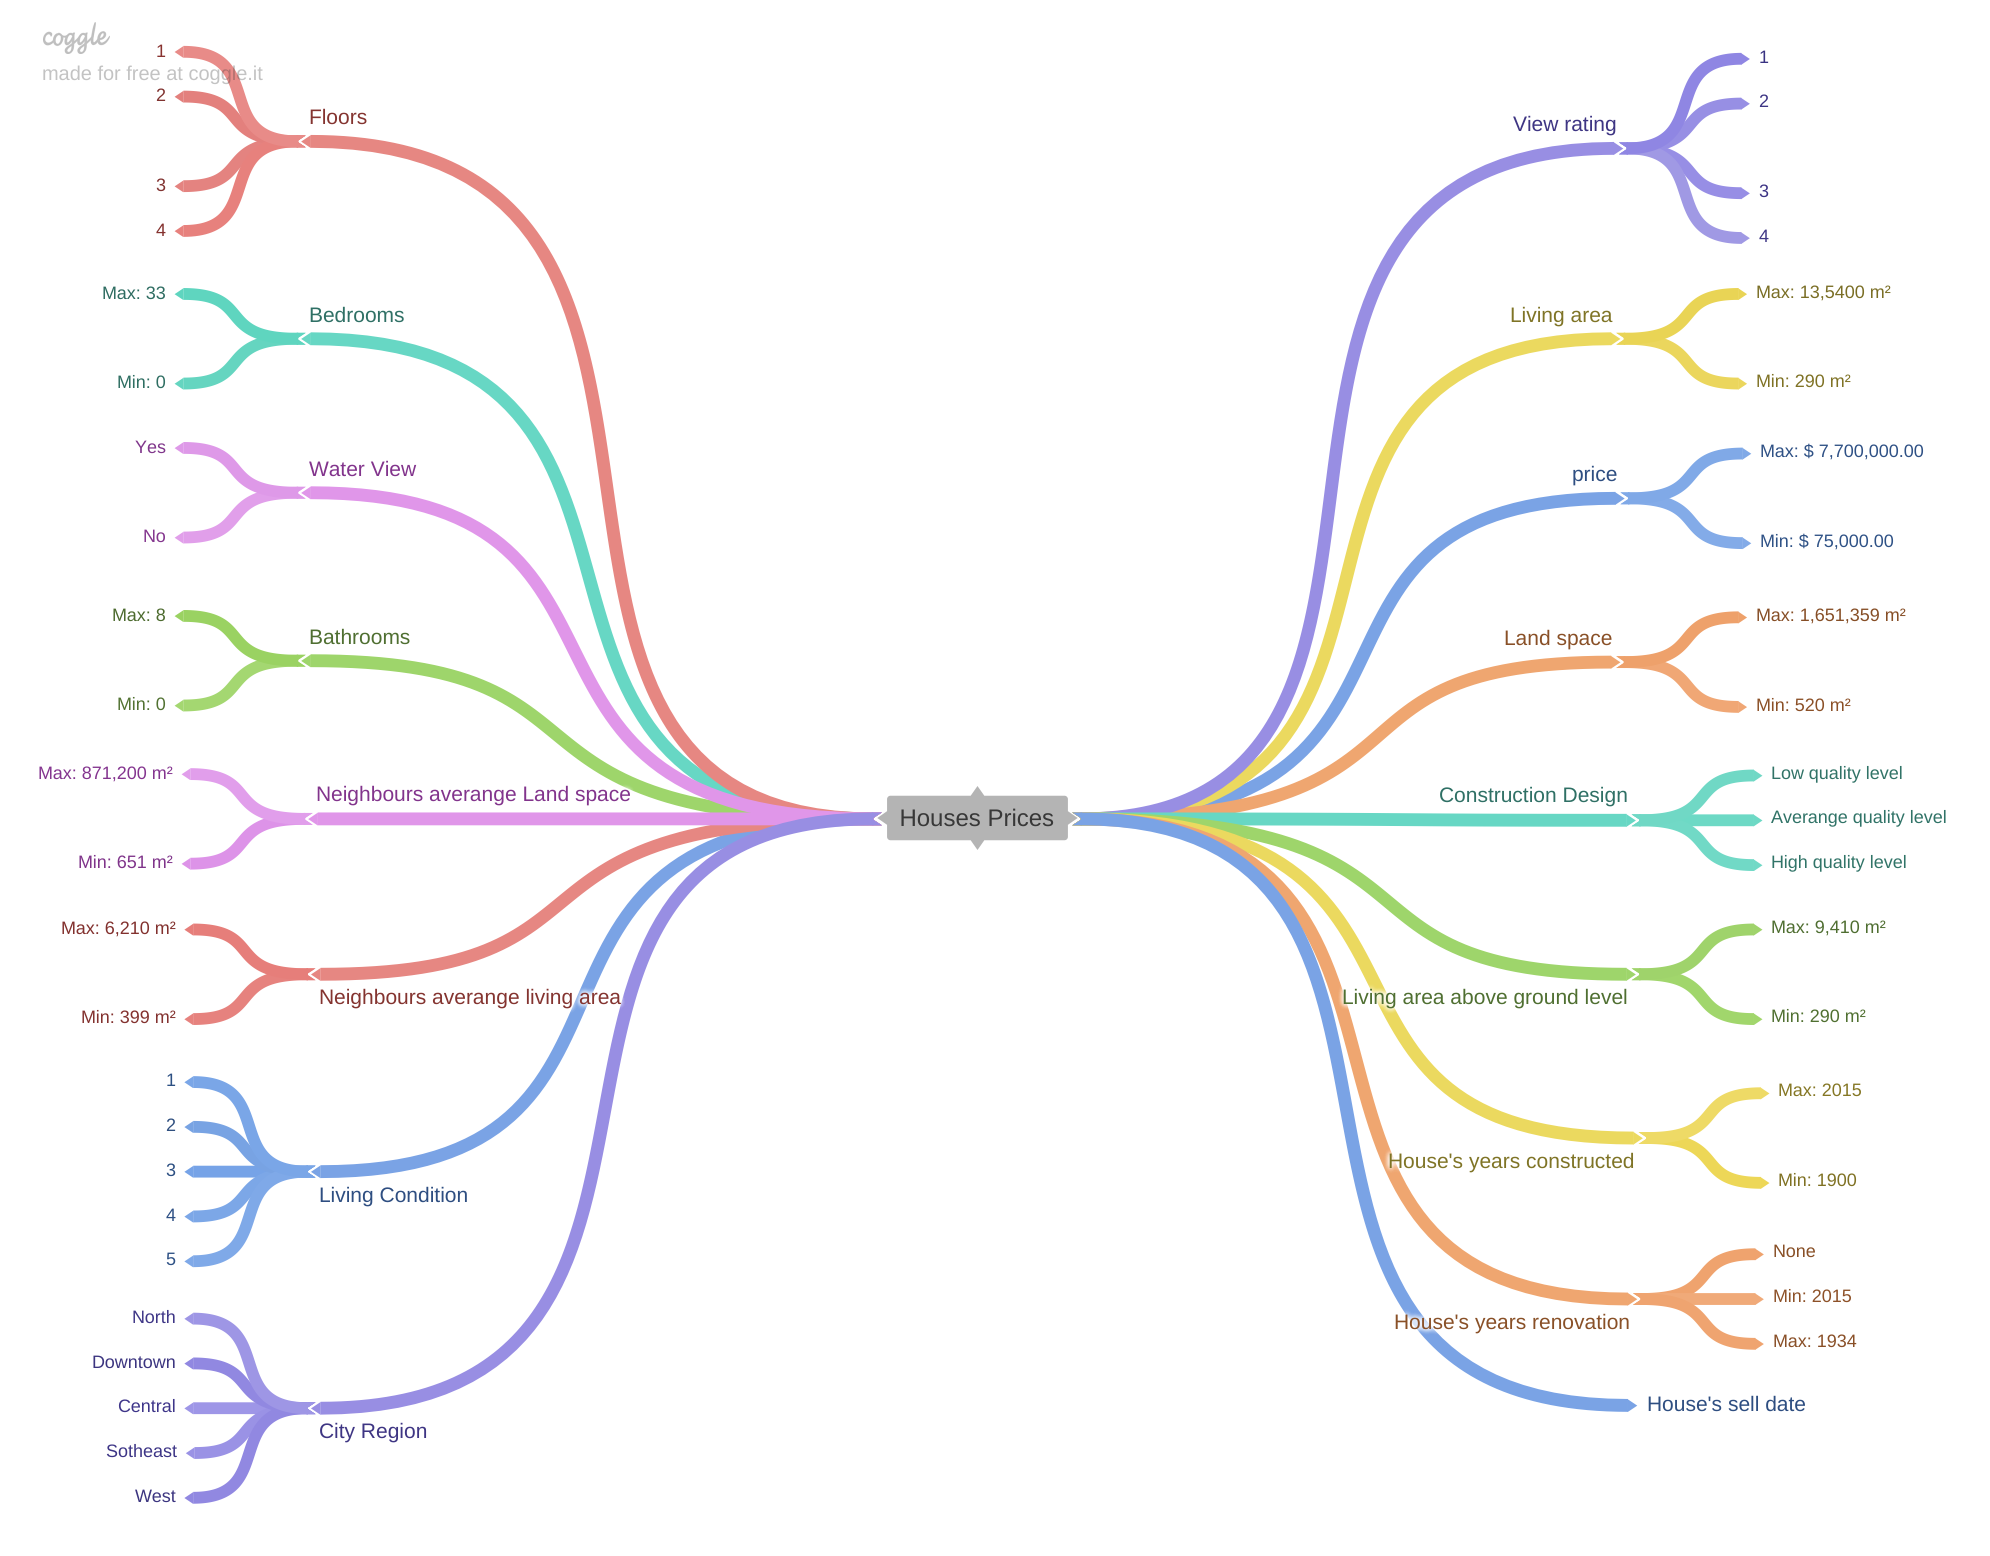

In [15]:
Image('../images/mind_map.png')

***
- **HYPOTHESIS 1 (H1):** For all city regions, their house's average price has a minimum increase of 10% by increasing the house's Living Condition.
- **HYPOTHESIS 2 (H2):** For all city regions, their house's average price has a minimum increase of 10% by increasing the house's Construction Design level.
- **HYPOTHESIS 3 (H3):** For North, downtown and west regions, their houses are more likely to be sold during the spring than any other season.
- **HYPOTHESIS 4 (H4):** For Central and Southeast regions, their houses are more likely to be sold during the winter than any other season.
- **HYPOTHESIS 5 (H5):** For all city regions, houses prices growth month over month is at a 3% minimum.
- **HYPOTHESIS 6 (H6):** For all city regions, houses prices growth year over year is at a 10% minimum.
- **HYPOTHESIS 7 (H7):** For all city regions, their houses floor's number growth increases the house's price at a 20% minimum.
- **HYPOTHESIS 8 (H8):**For all city regions, the Living Area size growth is more likely to increase the house's prices.
- **HYPOTHESIS 9 (H9):** For all city regions, the (Living Area / Land Space) proportion growth is more likely to increase the house's prices.
- **HYPOTHESIS 10 (H10):** Houses with water view has a average price growth of 10% by increasing the house's Living Condition.
- **HYPOTHESIS 11 (H11):** For all city regions, by increasing the bedrooms quantity its most likely to increases the house prices
- **HYPOTHESIS 12 (H12):** For all city regions, by increasing the bathrooms quantity its most likely to increases the house prices.

***
For the Seattle city regions split we used this font: <a href="https://homes.cs.washington.edu/~domta/seattle-inequity.html">**Here**</a></font>

By using the latitude and longitudes available in the dataset we could split the regions like this:

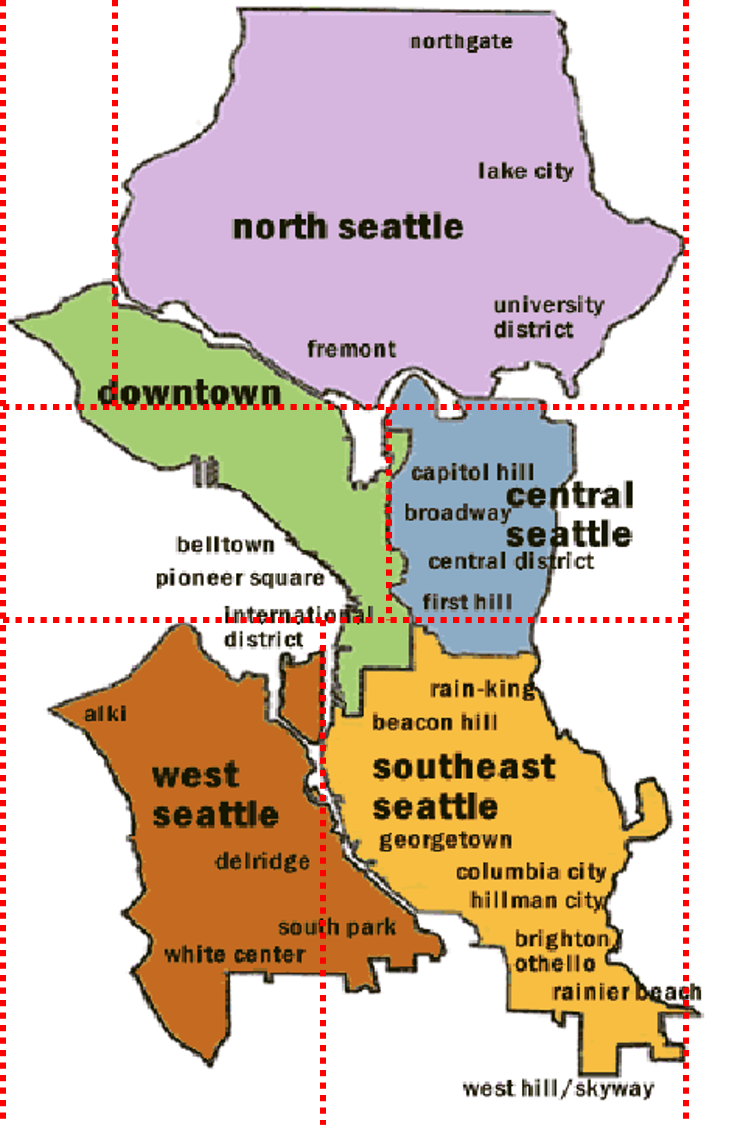

In [16]:
Image('../images/region_split.png')

## <font color=green size= 5>3.2 FEATURES TRANSFORMATION </font>
***

In [17]:
# creating the 'month_sale' as the year the house was sold
df2['month_sale'] = df2['date_sold'].dt.month


# creating the 'year_sale' as the year the house was sold
df2['year_sale'] = df2['date_sold'].dt.year


# creating the 'season_sale' as the season the house was sold
df2['season_sale'] = df2['month_sale'].apply(lambda x: 
                                                 'Summer' if 7 <= x <= 9 else
                                                 'Fall'   if 10 <= x <= 12 else
                                                 'Winter' if 1 <= x <= 3 else
                                                 'Spring')
               
    
# changing the 'water_view' column values
df2['water_view'] = df2['water_view'].apply(lambda x: 
                                                     'No' if x == 0 else
                                                     'Yes')


# changing the 'construction_design' column levels
df2['construction_design'] = df2['construction_design'].apply(lambda x: 
                                                                       'Low Quality' if 0 <= x <= 3 else
                                                                       'Average Quality' if 4 <= x < 11 else
                                                                       'High Quality')


# changing the 'basement' column to a dummy feature
df2['basement'] = df2['basement'].apply(lambda x: 
                                                 'No' if x == 0 else
                                                 'Yes')


# changing the 'floors' column values to integers. Removing the 0.5 values, which were considering it the basement or attic
df2['floors'] = np.array(df2['floors']).astype(int)


# changing the 'renovation' column to a dummy feature
df2['renovation'] = df2['renovation'].apply(lambda x: 
                                             'No' if x == 0 else
                                             'Yes')


# creating a dataset's column with the house's city region
df2['region'] = df2.apply(lambda x:
                                   'North'      if (x['latitude'] >= 47.644)          and   (x['longitude'] >= -122.410)   else
                                   'Downtown'   if (x['latitude'] >  47.644)          and   (x['longitude'] <  -122.410)   else
                                   'Downtown'   if (47.595 < x['latitude'] < 47.644)  and   (x['longitude'] <  -122.335)   else                          
                                   'Central'    if (47.595 < x['latitude'] < 47.644)  and   (x['longitude'] >= -122.335)   else
                                   'Southeast'  if (x['latitude'] <= 47.595)          and   (x['longitude'] >= -122.345)   else
                                   'West', axis= 1)

In [18]:
# removing the unnecessaries dataset's columns
df2.drop(columns= ['zipcode', 'date_sold'], axis= 1, inplace= True)

# displaying the first 5 dataframe's registers
df2.head()

,id,price,bedrooms,bathrooms,living_area,land_area,floors,water_view,view_level,living_condition,...,year_built,renovation,latitude,longitude,living_area_neighbors,land_area_neighbors,month_sale,year_sale,season_sale,region
0,7129300520,221900.0,3,1.00,1180,5650,1,No,0,3,...,1955,No,47.5112,-122.257,1340,5650,10,2014,Fall,Southeast
1,6414100192,538000.0,3,2.25,2570,7242,2,No,0,3,...,1951,Yes,47.7210,-122.319,1690,7639,12,2014,Fall,North
2,5631500400,180000.0,2,1.00,770,10000,1,No,0,3,...,1933,No,47.7379,-122.233,2720,8062,2,2015,Winter,North
3,2487200875,604000.0,4,3.00,1960,5000,1,No,0,5,...,1965,No,47.5208,-122.393,1360,5000,12,2014,Fall,West
4,1954400510,510000.0,3,2.00,1680,8080,1,No,0,3,...,1987,No,47.6168,-122.045,1800,7503,2,2015,Winter,Central


## <font color=green size= 5>3.3 OUTLIERS MANIPULATION </font>
***

**Some of the keypoints pointed at section 2.7 will be treated. Which are:**

- Houses with no bedrooms
- Houses with no bathrooms
- Houses prices outliers

### <font color=green size= 4>3.3.1 HOUSES WITH NO BEDROOMS </font>
***

In [19]:
# creating a dataset with the registers with no bedrooms
df_no_bedrooms = df2[df2['bedrooms']== 0]

# deleting the registers with no bedrooms from the 'df2' dataset
df2 = df2[~ (df2['bedrooms']== 0)]

# priting the amount of no bedrooms registers deleted
print('No bedrooms registers deleted: {}'.format(df_no_bedrooms.shape[0]))

No bedrooms registers deleted: 13


### <font color=green size= 4>3.3.2 HOUSES WITH NO BATHROOMS </font>
***

In [20]:
# creating a dataset with the registers with no bedrooms
df_no_bathrooms = df2[df2['bathrooms']== 0]

# deleting the registers with no bedrooms from the 'df2' dataset
df2 = df2[~ (df2['bathrooms']== 0)]

# priting the amount of no bedrooms registers deleted
print('No bathrooms registers deleted: {}'.format(df_no_bathrooms.shape[0]))

No bathrooms registers deleted: 3


***
**As seen above:**

All registers with no bathrooms seen to be the same deleted registers above, with no bedrooms.

### <font color=green size= 4>3.3.3 HOUSES PRICES OUTLIERS </font>
***

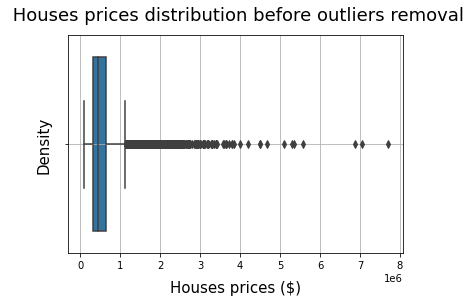

In [21]:
# creating a figure
fig= plt.plot(figsize= (40, 15))

# setting 'ax' graph, title, labels and sizes
ax = sns.boxplot(x= df2['price'])
ax.set_title(" Houses prices distribution before outliers removal", size= 18, pad= 15)
ax.set_xlabel("Houses prices ($)", size= 15, labelpad= 10)
ax.set_ylabel('Density', size= 15, labelpad= 10)
ax.grid()

***
**As seen above:**

- There is a significant amount of high outliers.
- By looking at the graph, the high outliers seems to be houses prices over \$ 2,000,000.00

Lets check it by using IQR method.

In [22]:
# calculating Q1, Q3 and IQR for houses prices
Q1 = np.log1p(np.quantile(df2['price'], .25))
Q3 = np.log1p(np.quantile(df2['price'], .75))
IQR = Q3 - Q1

# calculating the houses prices outliers boundaries through statistical definition at logarithmic dimensions
price_low_outliers = Q1 - 1.5 * IQR
price_high_outliers = Q3 + 1.5 * IQR

# returning the outliers values to real values
price_low_outliers = np.expm1(price_low_outliers)
price_high_outliers = np.expm1(price_high_outliers)

In [23]:
# printing the houses prices outliers range
print('Houses prices outliers:')
print(f" Houses prices outliers by statistical definition: Any 'price' feature's value lower than $ {round(price_low_outliers, 2)}")
print(f" Houses prices outliers by statistical definition: Any 'price' feature's value higher than $ {round(price_high_outliers, 2)}")

Houses prices outliers:
 Houses prices outliers by statistical definition: Any 'price' feature's value lower than $ 114020.59
 Houses prices outliers by statistical definition: Any 'price' feature's value higher than $ 1824333.08


In [24]:
df_low_prices = df2[df2['price'] < price_low_outliers]

df_high_prices = df2[df2['price'] > price_high_outliers]

print('Dataset registers: {}'.format(df2.shape[0]))
print('Low outliers registers to delete: {}'.format(df_low_prices.shape[0]))
print('High outliers registers to delete: {}'.format(df_high_prices.shape[0]))

Dataset registers: 21420
Low outliers registers to delete: 52
High outliers registers to delete: 281


***
**As seen above:**

There won't be a significant changing in the dataset size after deleting the outliers. So let's proceed with it.

In [25]:
# removing the houses prices outliers from 'df2' dataset
df2 = df2[~ ((df2['price'] < price_low_outliers) | (df2['price'] > price_high_outliers))]

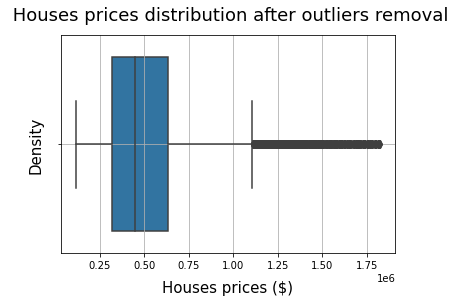

In [26]:
# creating a figure
fig= plt.plot(figsize= (40, 15))

# setting 'ax' graph, title, labels and sizes
ax = sns.boxplot(x= df2['price'])
ax.set_title(" Houses prices distribution after outliers removal", size= 18, pad= 15)
ax.set_xlabel("Houses prices ($)", size= 15, labelpad= 10)
ax.set_ylabel('Density', size= 15, labelpad= 10)
ax.grid()

# <font color=green size= 6> <b>4. EXPLORATORY DATA ANALYSIS </font></b>
***

In [27]:
# creating a dataframe's copy to work, from the original 'df2' dataframe
df3 = df2.copy()

# displaying the first 5 dataframe's registers 
df3.head()

,id,price,bedrooms,bathrooms,living_area,land_area,floors,water_view,view_level,living_condition,...,year_built,renovation,latitude,longitude,living_area_neighbors,land_area_neighbors,month_sale,year_sale,season_sale,region
0,7129300520,221900.0,3,1.00,1180,5650,1,No,0,3,...,1955,No,47.5112,-122.257,1340,5650,10,2014,Fall,Southeast
1,6414100192,538000.0,3,2.25,2570,7242,2,No,0,3,...,1951,Yes,47.7210,-122.319,1690,7639,12,2014,Fall,North
2,5631500400,180000.0,2,1.00,770,10000,1,No,0,3,...,1933,No,47.7379,-122.233,2720,8062,2,2015,Winter,North
3,2487200875,604000.0,4,3.00,1960,5000,1,No,0,5,...,1965,No,47.5208,-122.393,1360,5000,12,2014,Fall,West
4,1954400510,510000.0,3,2.00,1680,8080,1,No,0,3,...,1987,No,47.6168,-122.045,1800,7503,2,2015,Winter,Central


## <font color=green size= 5>4.1 UNIVARIATE ANALYSIS </font>
***

### <font color=green size= 4>4.1.1 CATEGORICAL VARIABLES </font>
***

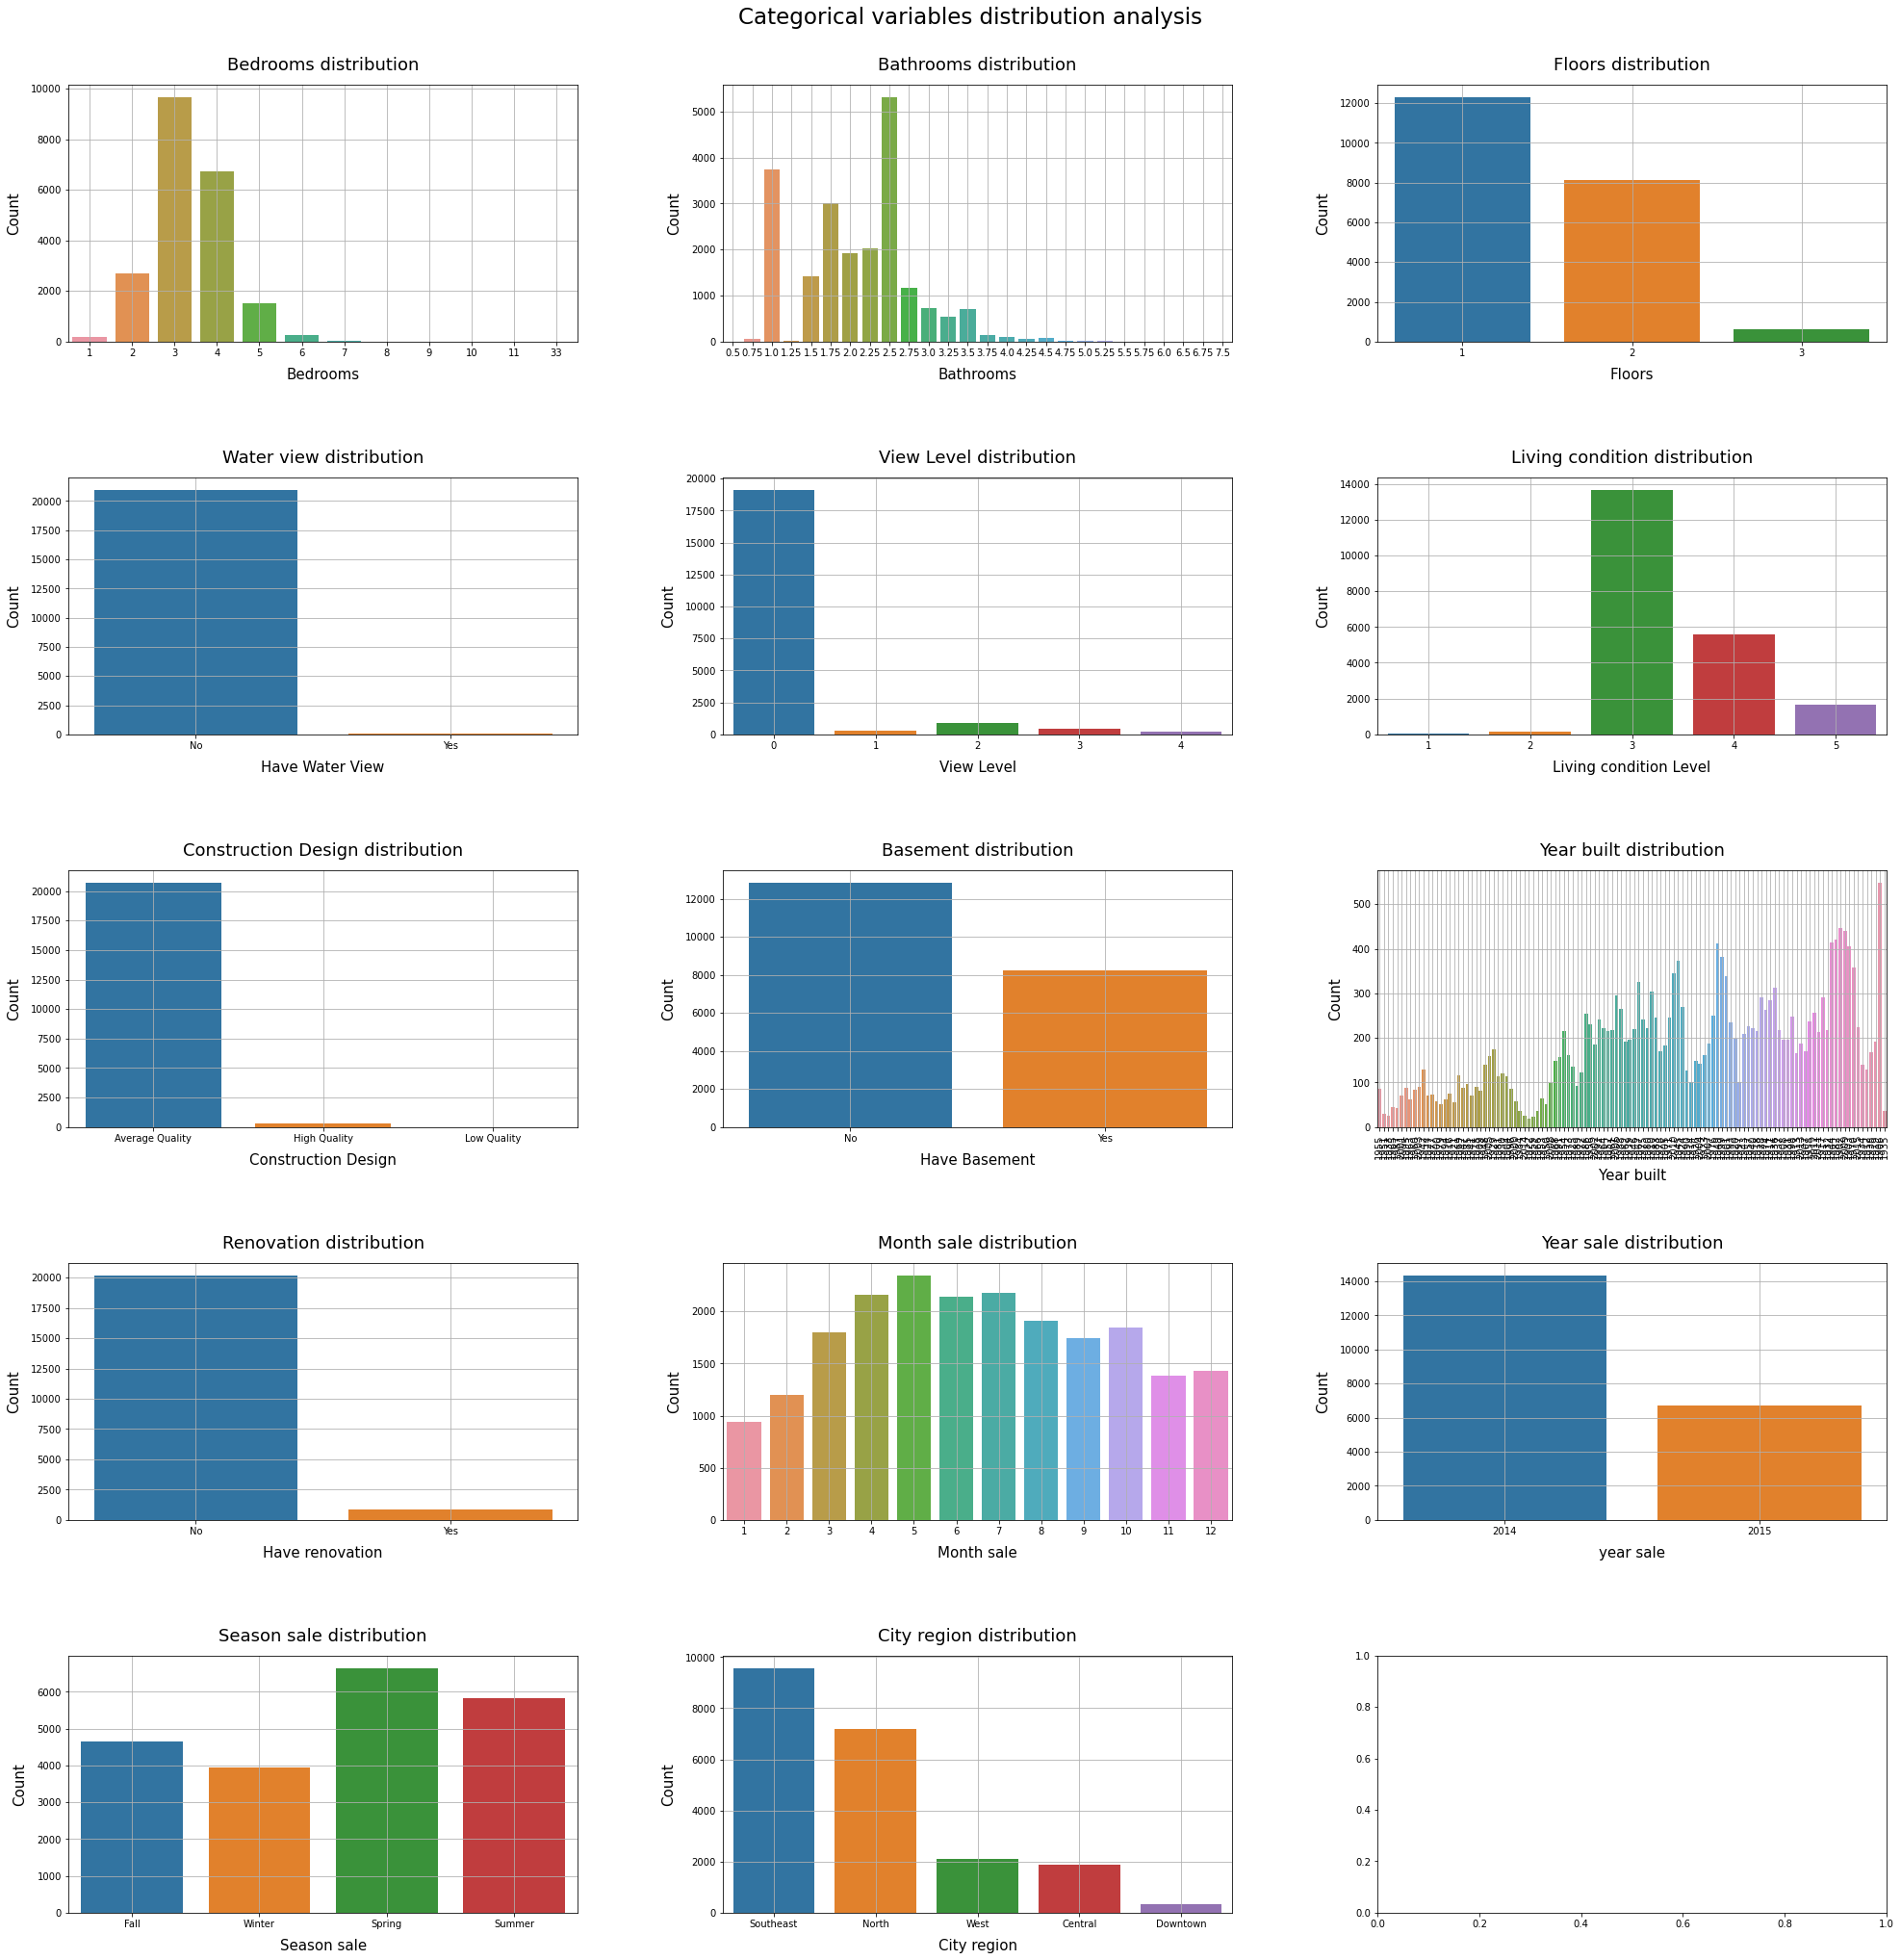

In [28]:
# creating a figure with 5 rows and 3 columns of axes
fig, axes = plt.subplots(5, 3, figsize= (30, 30))
fig.tight_layout(pad= 12)

# setting the figure title and size
fig.suptitle('Categorical variables distribution analysis', size=23)

# setting 0,0 axes graph, title, labels and sizes
sns.countplot(ax= axes[0,0], x= df3['bedrooms'])
axes[0,0].set_title('Bedrooms distribution', size= 18, pad= 15)
axes[0,0].set_xlabel('Bedrooms', size= 15, labelpad= 10)
axes[0,0].set_ylabel('Count', size= 15, labelpad= 10)
axes[0,0].grid()

# setting 0,1 axes graph, title, labels and sizes
sns.countplot(ax= axes[0,1], x= df3['bathrooms'])
axes[0,1].set_title('Bathrooms distribution', size= 18, pad= 15)
axes[0,1].set_xlabel('Bathrooms', size= 15, labelpad= 10)
axes[0,1].set_ylabel('Count', size= 15, labelpad= 10)
axes[0,1].grid()

# setting 0,2 axes graph, title, labels and sizes
sns.countplot(ax= axes[0,2], x= df3['floors'])
axes[0,2].set_title('Floors distribution', size= 18, pad= 15)
axes[0,2].set_xlabel('Floors', size= 15, labelpad= 10)
axes[0,2].set_ylabel('Count', size= 15, labelpad= 10)
axes[0,2].grid()

# setting 1,0 axes graph, title, labels and sizes
sns.countplot(ax= axes[1,0], x= df3['water_view'])
axes[1,0].set_title('Water view distribution', size= 18, pad= 15)
axes[1,0].set_xlabel('Have Water View', size= 15, labelpad= 10)
axes[1,0].set_ylabel('Count', size= 15, labelpad= 10)
axes[1,0].grid()

# setting 1,1 axes graph, title, labels and sizes
sns.countplot(ax= axes[1,1], x= df3['view_level'])
axes[1,1].set_title('View Level distribution', size= 18, pad= 15)
axes[1,1].set_xlabel('View Level', size= 15, labelpad= 10)
axes[1,1].set_ylabel('Count', size= 15, labelpad= 10)
axes[1,1].grid()

# setting 1,2 axes graph, title, labels and sizes
sns.countplot(ax= axes[1,2], x= df3['living_condition'])
axes[1,2].set_title("Living condition distribution", size= 18, pad= 15)
axes[1,2].set_xlabel("Living condition Level", size= 15, labelpad= 10)
axes[1,2].set_ylabel('Count', size= 15, labelpad= 10)
axes[1,2].grid()

# setting 2,0 axes graph, title, labels and sizes
sns.countplot(ax= axes[2,0], x= df3['construction_design'])
axes[2,0].set_title("Construction Design distribution", size= 18, pad= 15)
axes[2,0].set_xlabel("Construction Design", size= 15, labelpad= 10)
axes[2,0].set_ylabel('Count', size= 15, labelpad= 10)
axes[2,0].grid()

# setting 2,1 axes graph, title, labels, ticks and sizes
sns.countplot(ax= axes[2,1], x= df3['basement'])
axes[2,1].set_title('Basement distribution', size= 18, pad= 15)
axes[2,1].set_xlabel('Have Basement', size= 15, labelpad= 10)
axes[2,1].set_ylabel('Count', size= 15, labelpad= 10)
axes[2,1].grid()

# setting 2,2 axes graph, title, labels and sizes
sns.countplot(ax= axes[2,2], x= df3['year_built'])
axes[2,2].set_title('Year built distribution', size= 18, pad= 15)
axes[2,2].set_xlabel('Year built', size= 15, labelpad= 10)
axes[2,2].set_ylabel('Count', size= 15, labelpad= 10)
axes[2,2].set_xticklabels(labels=df3['year_built'].unique() ,rotation= 90)
axes[2,2].grid()

# setting 3,0 axes graph, title, labels and sizes
sns.countplot(ax= axes[3,0], x= df3['renovation'])
axes[3,0].set_title('Renovation distribution', size= 18, pad= 15)
axes[3,0].set_xlabel('Have renovation', size= 15, labelpad= 10)
axes[3,0].set_ylabel('Count', size= 15, labelpad= 10)
axes[3,0].grid()

# setting 3,1 axes graph, title, labels and sizes
sns.countplot(ax= axes[3,1], x= df3['month_sale'])
axes[3,1].set_title('Month sale distribution', size= 18, pad= 15)
axes[3,1].set_xlabel('Month sale', size= 15, labelpad= 10)
axes[3,1].set_ylabel('Count', size= 15, labelpad= 10)
axes[3,1].grid()

# setting 3,2 axes graph, title, labels and sizes
sns.countplot(ax= axes[3,2], x= df3['year_sale'])
axes[3,2].set_title('Year sale distribution', size= 18, pad= 15)
axes[3,2].set_xlabel('year sale', size= 15, labelpad= 10)
axes[3,2].set_ylabel('Count', size= 15, labelpad= 10)
axes[3,2].grid()

# setting 4,0 axes graph, title, labels and sizes
sns.countplot(ax= axes[4,0], x= df3['season_sale'])
axes[4,0].set_title('Season sale distribution', size= 18, pad= 15)
axes[4,0].set_xlabel('Season sale', size= 15, labelpad= 10)
axes[4,0].set_ylabel('Count', size= 15, labelpad= 10)
axes[4,0].grid()

# setting 4,1 axes graph, title, labels and sizes
sns.countplot(ax= axes[4,1], x= df3['region'])
axes[4,1].set_title('City region distribution', size= 18, pad= 15)
axes[4,1].set_xlabel('City region', size= 15, labelpad= 10)
axes[4,1].set_ylabel('Count', size= 15, labelpad= 10)
axes[4,1].grid()

# saving the graph as 'cat_features_distribution' in the storytelling folder  
plt.savefig('../storytelling/cat_features_distribution.png')

***
**As seen above:**

- The bedrooms quantity is concentrated between 1 and 6. Which the most common is houses with 3 bedrooms, followed by 4 and 2 
<br>

- Talking about bathrooms, the most common is houses with 2.5 bathrooms, probably 2 bathrooms and a toilet (0.5)
<br>

- Talking about floors, the most common is houses with only 1 floor, followed by 2 and 3
<br>

- When it comes about water view, only a few percent of the houses have it
<br>

- When it comes about view level, almost all houses have a poor (0) view level
<br>

- When it comes about living condition, we can say that people in Seattle live quite good. With almost all houses having a level 3 or more living condition and only a few percent of the houses being a bad place to live in
<br>

- Talking about the construction design, almost all houses are labeled as having a average quality
<br>

- Talking about having a basement or not, its impressive that almost 40% of the houses have it
<br>

- When it comes about the house's year built, there is not a perceptive pattern, with some ups and downs between this period
<br>

- When it comes about if the house had a renovation, only a few did it
<br>

- Talking about the house's sales distribution between months, is clearly visible that between April and July is the period that sells more houses during the year
<br>

- When it comes about the house's sales distribution between years, even with only 2 years and a 12 months range, its impressive that from January-2015 until April-2015 there is almost the half of the houses sold compared to the hole 2014 year
<br>

- Talking about the house's sales distribution between the weather seasons, is clearly visible that the season that sells more houses is Spring, followed by summer
<br>

- When it comes about the house distribution between the city's region, more than a half of the houses as located in Southeast and North regions

### <font color=green size= 4>4.1.2 NUMERICAL VARIABLES </font>
***

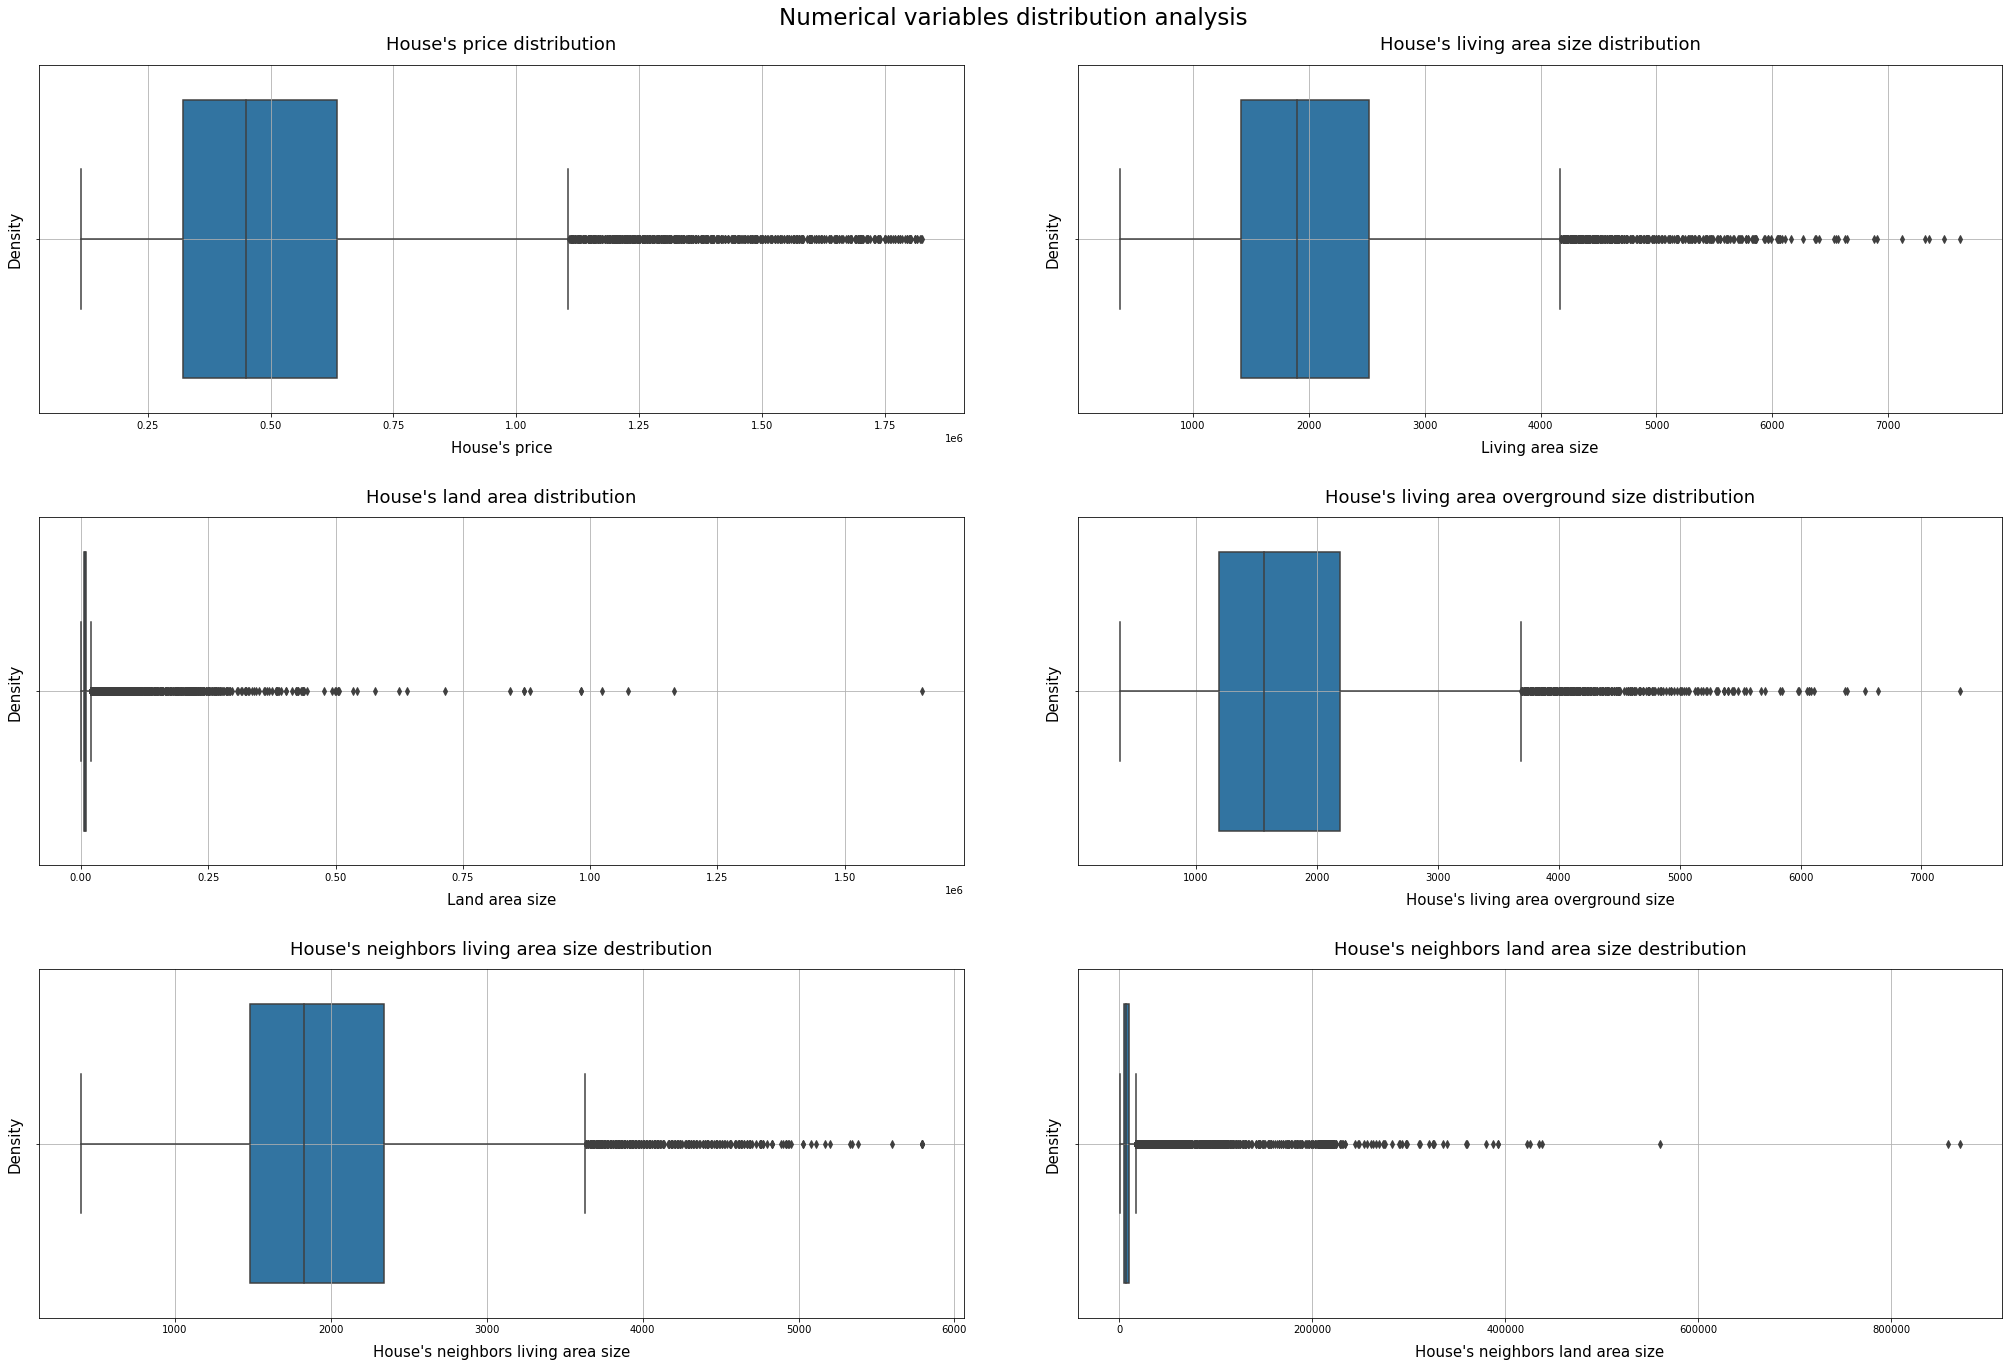

In [29]:
# creating a figure with 3 rows and 2 columns of axes
fig, axes = plt.subplots(3, 2, figsize= (30, 20))
fig.tight_layout(pad=8.3)

# setting the figure title and size
fig.suptitle('Numerical variables distribution analysis', size= 23)

# setting 0,0 axes graph, title, labels and sizes
sns.boxplot(ax= axes[0,0], x= df3['price'])
axes[0,0].set_title("House's price distribution", size= 18, pad= 15)
axes[0,0].set_xlabel("House's price", size= 15, labelpad= 10)
axes[0,0].set_ylabel('Density', size= 15, labelpad= 10)
axes[0,0].grid()

# setting 0,1 axes graph, title, labels and sizes
sns.boxplot(ax= axes[0,1], x= df3['living_area'])
axes[0,1].set_title("House's living area size distribution", size= 18, pad= 15)
axes[0,1].set_xlabel("Living area size", size= 15, labelpad= 10)
axes[0,1].set_ylabel('Density', size= 15, labelpad= 10)
axes[0,1].grid()

# setting 0,2 axes graph, title, labels and sizes
sns.boxplot(ax= axes[1,0], x= df3['land_area'])
axes[1,0].set_title("House's land area distribution", size= 18, pad= 15)
axes[1,0].set_xlabel("Land area size", size= 15, labelpad= 10)
axes[1,0].set_ylabel('Density', size= 15, labelpad= 10)
axes[1,0].grid()

# setting 1,0 axes graph, title, labels and sizes
sns.boxplot(ax= axes[1,1], x= df3['living_area_over_ground'])
axes[1,1].set_title("House's living area overground size distribution", size= 18, pad= 15)
axes[1,1].set_xlabel("House's living area overground size", size= 15, labelpad= 10)
axes[1,1].set_ylabel('Density', size= 15, labelpad= 10)
axes[1,1].grid()

# setting 1,1 axes graph, title, labels and sizes
sns.boxplot(ax= axes[2,0], x= df3['living_area_neighbors'])
axes[2,0].set_title("House's neighbors living area size destribution", size= 18, pad= 15)
axes[2,0].set_xlabel("House's neighbors living area size", size= 15, labelpad= 10)
axes[2,0].set_ylabel('Density', size= 15, labelpad= 10)
axes[2,0].grid()

# setting 1,2 axes graph, title, labels and sizes
sns.boxplot(ax= axes[2,1], x= df3['land_area_neighbors'])
axes[2,1].set_title("House's neighbors land area size destribution", size= 18, pad= 15)
axes[2,1].set_xlabel("House's neighbors land area size", size= 15, labelpad= 10)
axes[2,1].set_ylabel('Density', size= 15, labelpad= 10)
axes[2,1].grid()

# saving the graph as 'num_features_distribution' in the storytelling folder  
plt.savefig('../storytelling/num_features_distribution.png')

***
**As seen above:**

- All numerical variables have significant high outliers
- **`land_area`** and **`neighbors_land_area`** have the most significant outliers amount

But, we won't go back to check these features outliers, because they won't affect our hypotheses analysis.

## <font color=green size= 5>4.2 BIVARIATE ANALYSIS </font>
***


### <font color=green size= 4>4.2.1 **HYPOTHESIS 1 (H1):** For all city regions, their house's average price has a minimum increase of 10% by increasing the house's Living Condition  </font> - **FALSE**
***

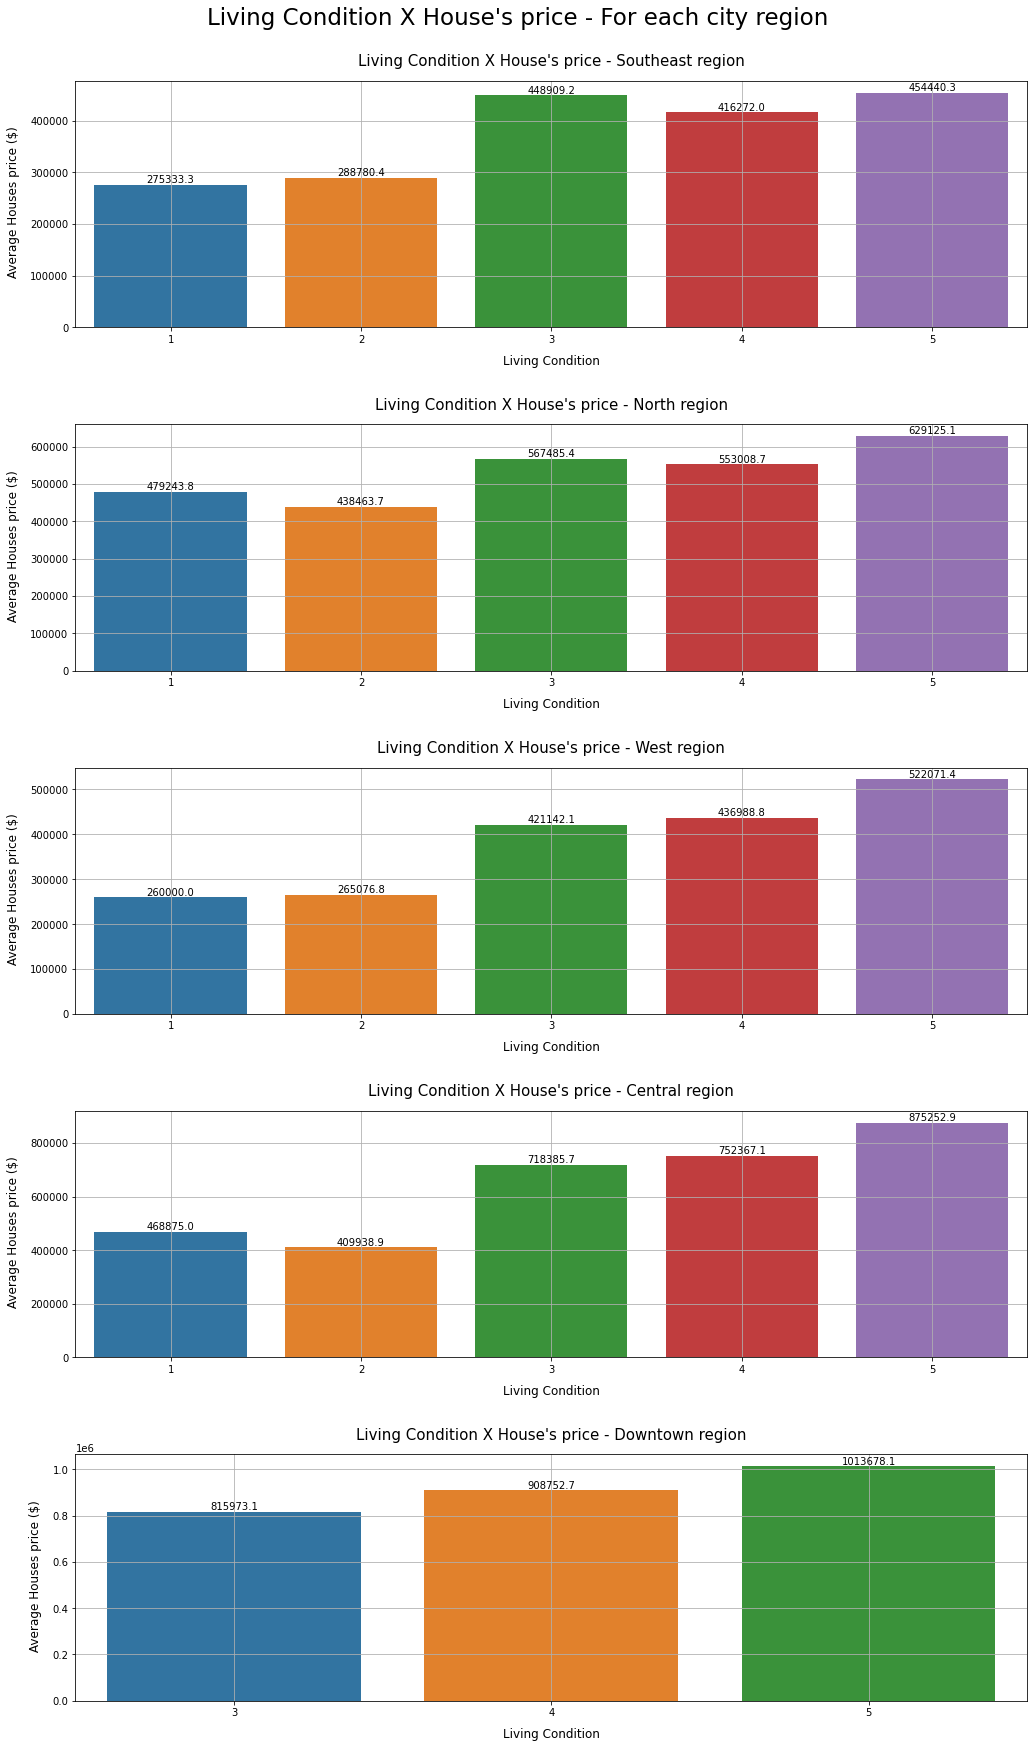

In [30]:
# creating a list with the city regions
regions = list(df3['region'].unique())

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(5, 1, figsize= (15, 25))

# setting the figure title and size
fig.suptitle(f"Living Condition X House's price - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(5*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(5, 1, n+1)  

    # calling the 'aux_by_region' function to create an auxilar dataset
    aux_region = aux_by_region(region, 'price', 'living_condition')

    # setting axes graph, title, labels and sizes
    ax = sns.barplot(x= aux_region['living_condition'], y= aux_region['price'])
    ax.set_title(f"Living Condition X House's price - {region} region", size= 15, pad= 15)
    ax.set_xlabel(f'Living Condition', size= 12, labelpad= 10)
    ax.set_ylabel(f' Average Houses price ($)', size= 12, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H1' in the storytelling folder 
plt.savefig(f'../storytelling/H1.png')

# displaying the plot
plt.show()

***
**As seen above:**

- Southeast region don't have the average house's price minimum increase of 10% for each living condition levels upgrade. It can be seen when upgrading the living condition from level 3 to level 4, the house prices decreases. But, it has a significant 55,80% average houses price increase by upgrade the living condition level 2 to level 3.

- North region don't have the average house's price minimum increase of 10% for each living condition levels upgrade. Neither a significant average houses price increase when upgrading the living condition level.

- Even though west region has the average average house prices increase by upgrading the levels condition, when upgrading the living condition level 1 to level 2, its increases is only 1,95%. But, it has a significant 58,83% average houses price increase by upgrade the living condition level 2 to level 3.

- Central region don't have the average house's price minimum increase of 10% for each living condition levels upgrade. It can be seen when upgrading the living condition from level 1 to level 2, the house prices decreases. But, it has a significant 75,53% average houses price increase by upgrade the living condition level 2 to level 3.

- Downtown region have the average house's price minimum increase of 10% for each living condition levels upgrade. But, the houses prices increases when upgrading the living condition level are not significant, something like 11% for both levels. Also, it can be seen that the downtown region doesn't have living condition levels 1 and 2.

### <font color=green size= 4>4.2.2 **HYPOTHESIS 2 (H2):** For all city regions, their house's average price has a minimum increase of 10% by increasing the house's Construction Design level   </font> - **TRUE**
***

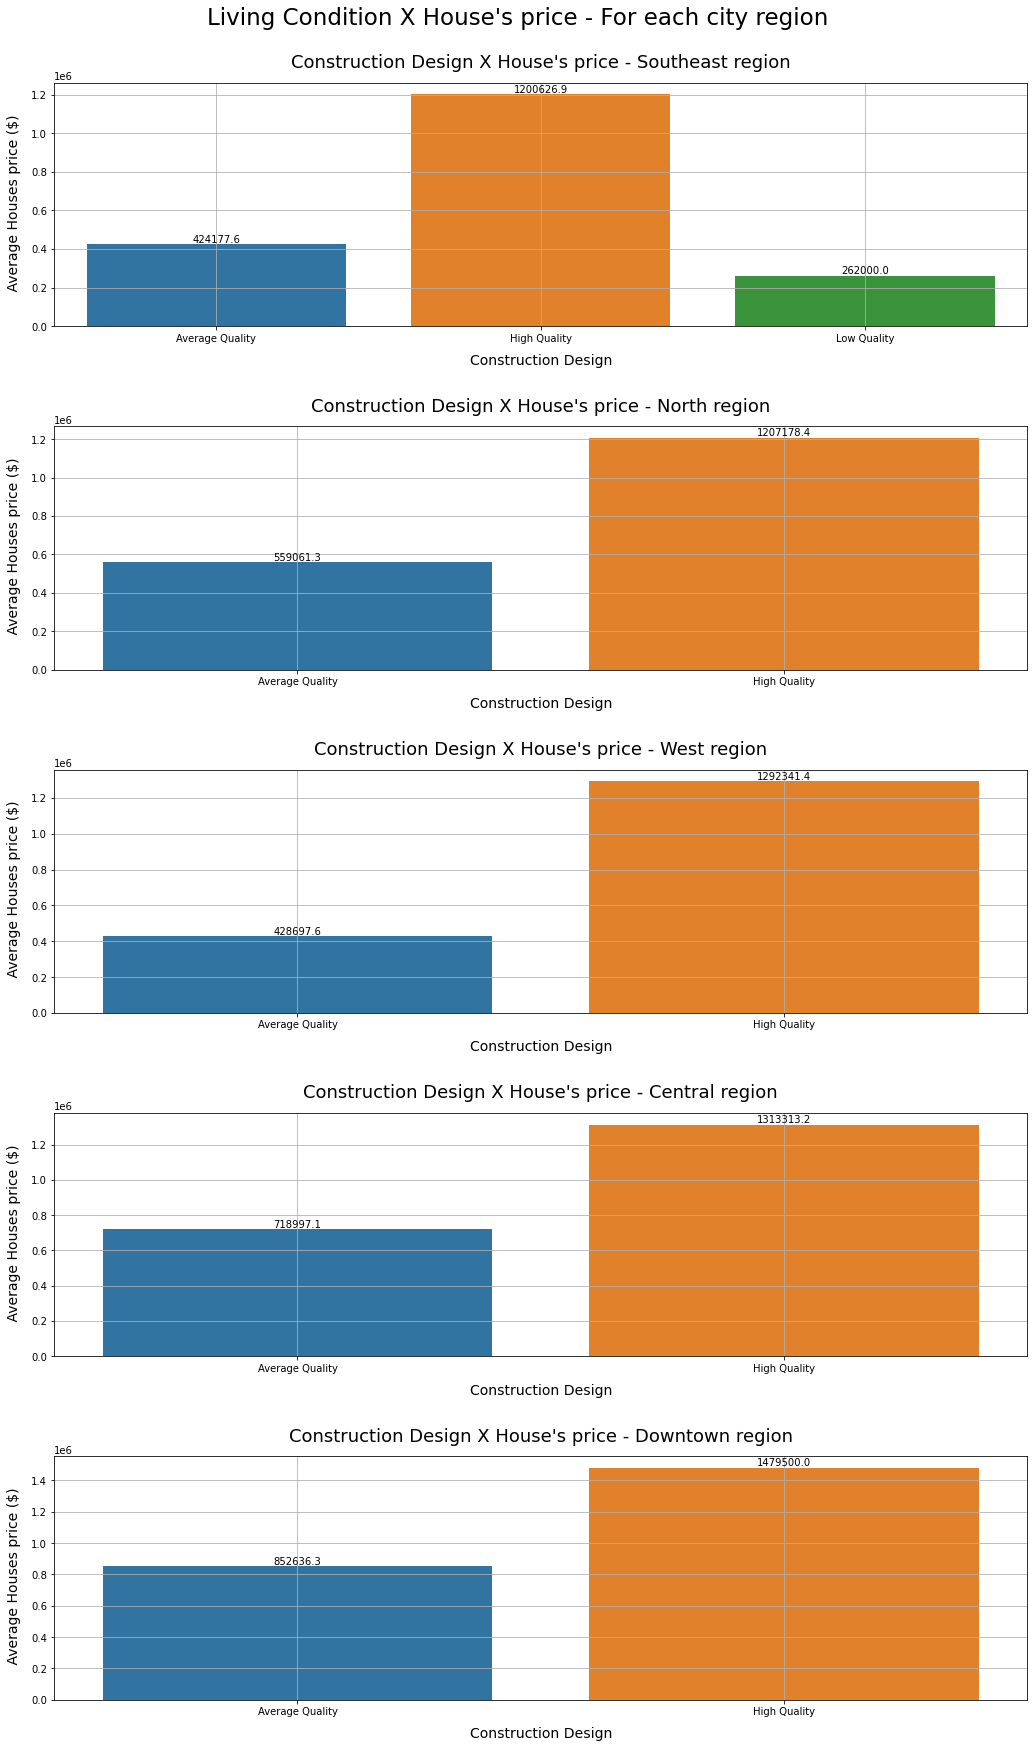

In [31]:
# creating a list with the city regions wich we are interested
regions = list(df3['region'].unique())

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(5, 1, figsize= (15, 25))

# setting the figure title and size
fig.suptitle(f"Living Condition X House's price - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(5*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(5, 1, n+1)  

    # calling the 'aux_by_region' function to create an auxilar dataset
    aux_region = aux_by_region(region, 'price', 'construction_design')

    # setting axes graph, title, labels and sizes
    ax = sns.barplot(x= aux_region['construction_design'], y= aux_region['price'])
    ax.set_title(f"Construction Design X House's price - {region} region", size= 18, pad= 15)
    ax.set_xlabel(f'Construction Design', size= 14, labelpad= 10)
    ax.set_ylabel(f' Average Houses price ($)', size= 14, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H2' in the storytelling folder 
plt.savefig(f'../storytelling/H2.png')

# displaying the plot
plt.show()

***
**As seen above:**

- Southeast region do have the average house's price minimum increase of 10% for each construction design level upgrade. Also, it is the only region with low quality, when it comes about houses construction design. This because, probably, its the poorest city's region.
<br>

- North region do have the average house's price minimum increase of 10% for each construction design level upgrade. It only has average and high quality levels. The average house's price difference when upgrading from level 2 to 3 is 115,92% raise
<br>

- West region do have the average house's price minimum increase of 10% for each construction design level upgrade. It only has average and high quality levels. The average house's price difference when upgrading from level 2 to 3 is 201,46% raise
<br>

- Central region do have average house's price the minimum increase of 10% for each construction design level upgrade. It only has average and high quality levels. The average house's price difference when upgrading from level 2 to 3 is 82,69% raise
<br>

- Downtown region do have average house's price the minimum increase of 10% for each construction design level upgrade. It only has average and high quality levels. The average house's price difference when upgrading from level 2 to 3 is 73,52% raise

### <font color=green size= 4>4.2.3 **HYPOTHESIS 3 (H3):** For North, downtown and west regions, their houses are more likely to be sold during the spring than any other season  </font> - **TRUE**
***

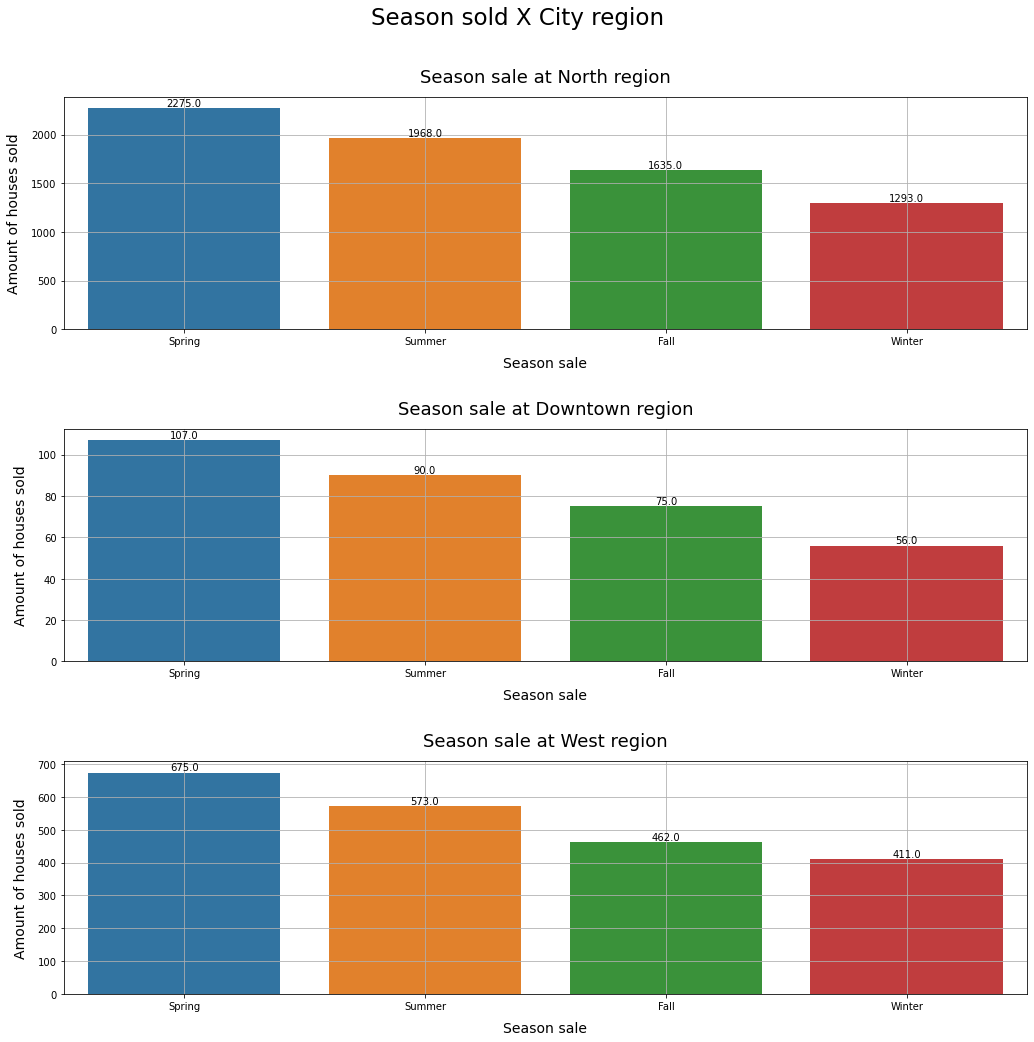

In [32]:
# creating a list with the city regions wich we are interested
regions = ['North', 'Downtown', 'West']

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(3, 1, figsize= (15, 15))

# setting the figure title and size
fig.suptitle("Season sold X City region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(3*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(3, 1, n+1)  

    aux_region = df3[df3['region'] == region] 
    aux_region = pd.DataFrame(aux_region['season_sale'].value_counts()).reset_index(drop= False)
    aux_region.columns = ['season', 'count']
    
    # setting axes graph, title, labels and sizes
    ax = sns.barplot(x= aux_region['season'], y= aux_region['count'])
    ax.set_title(f"Season sale at {region} region", size= 18, pad= 15)
    ax.set_xlabel(f'Season sale', size= 14, labelpad= 10)
    ax.set_ylabel(f'Amount of houses sold', size= 14, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H3' in the storytelling folder 
plt.savefig(f'../storytelling/H3.png')

# displaying the plot
plt.show()

***
**As seen above:**

All 3 regions have the approximately the same pattern when we talk about houses sale. Selling more houses during the spring, followed by summer, fall and winter.

### <font color=green size= 4>4.2.4 **HYPOTHESIS 4 (H4):** For Central and Southeast regions, their houses are more likely to be sold during the winter than any other season  </font> - **FALSE**
***

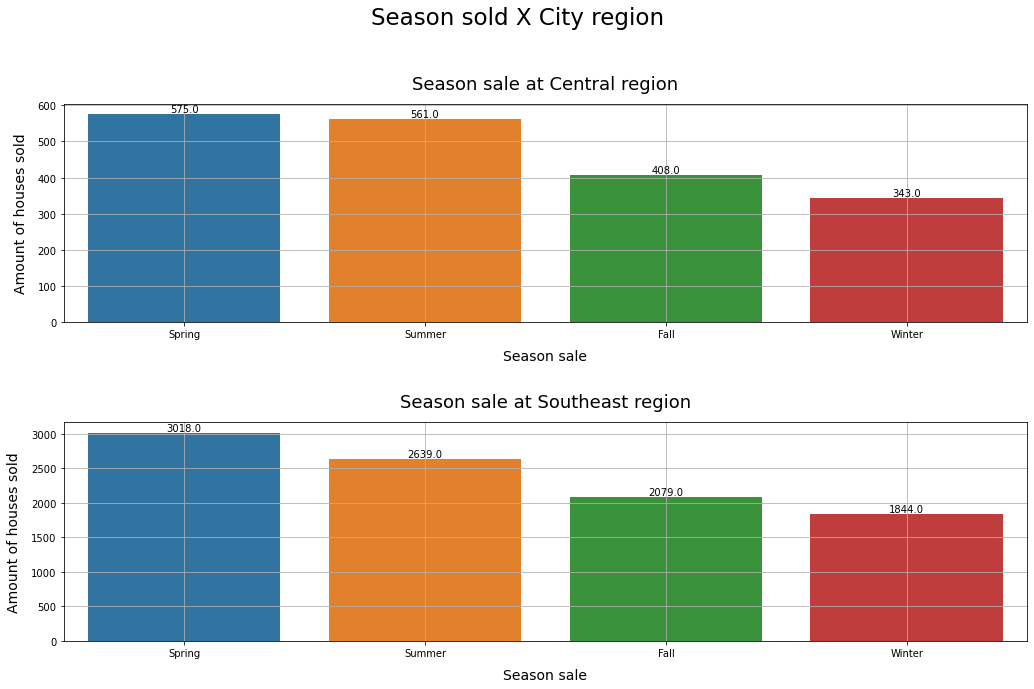

In [33]:
# creating a list with the city regions wich we are interested
regions = ['Central', 'Southeast']

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(2, 1, figsize= (15, 10))

# setting the figure title and size
fig.suptitle("Season sold X City region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(2*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(2, 1, n+1)  

    aux_region = df3[df3['region'] == region] 
    aux_region = pd.DataFrame(aux_region['season_sale'].value_counts()).reset_index(drop= False)
    aux_region.columns = ['season', 'count']
    
    # setting axes graph, title, labels and sizes
    ax = sns.barplot(x= aux_region['season'], y= aux_region['count'])
    ax.set_title(f"Season sale at {region} region", size= 18, pad= 15)
    ax.set_xlabel(f'Season sale', size= 14, labelpad= 10)
    ax.set_ylabel(f'Amount of houses sold', size= 14, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H4' in the storytelling folder 
plt.savefig(f'../storytelling/H4.png')

# displaying the plot
plt.show()

***
**As seen above:**

Both regions have the approximately the same pattern when we talk about houses sale, which is almost the same of the other 3 regions. Selling more houses during the spring, followed by summer, fall and winter.

### <font color=green size= 4>4.2.5 **HYPOTHESIS 5 (H5):** For all city regions, houses prices growth month over month is at a 3% minimum  </font> - **FALSE**
***

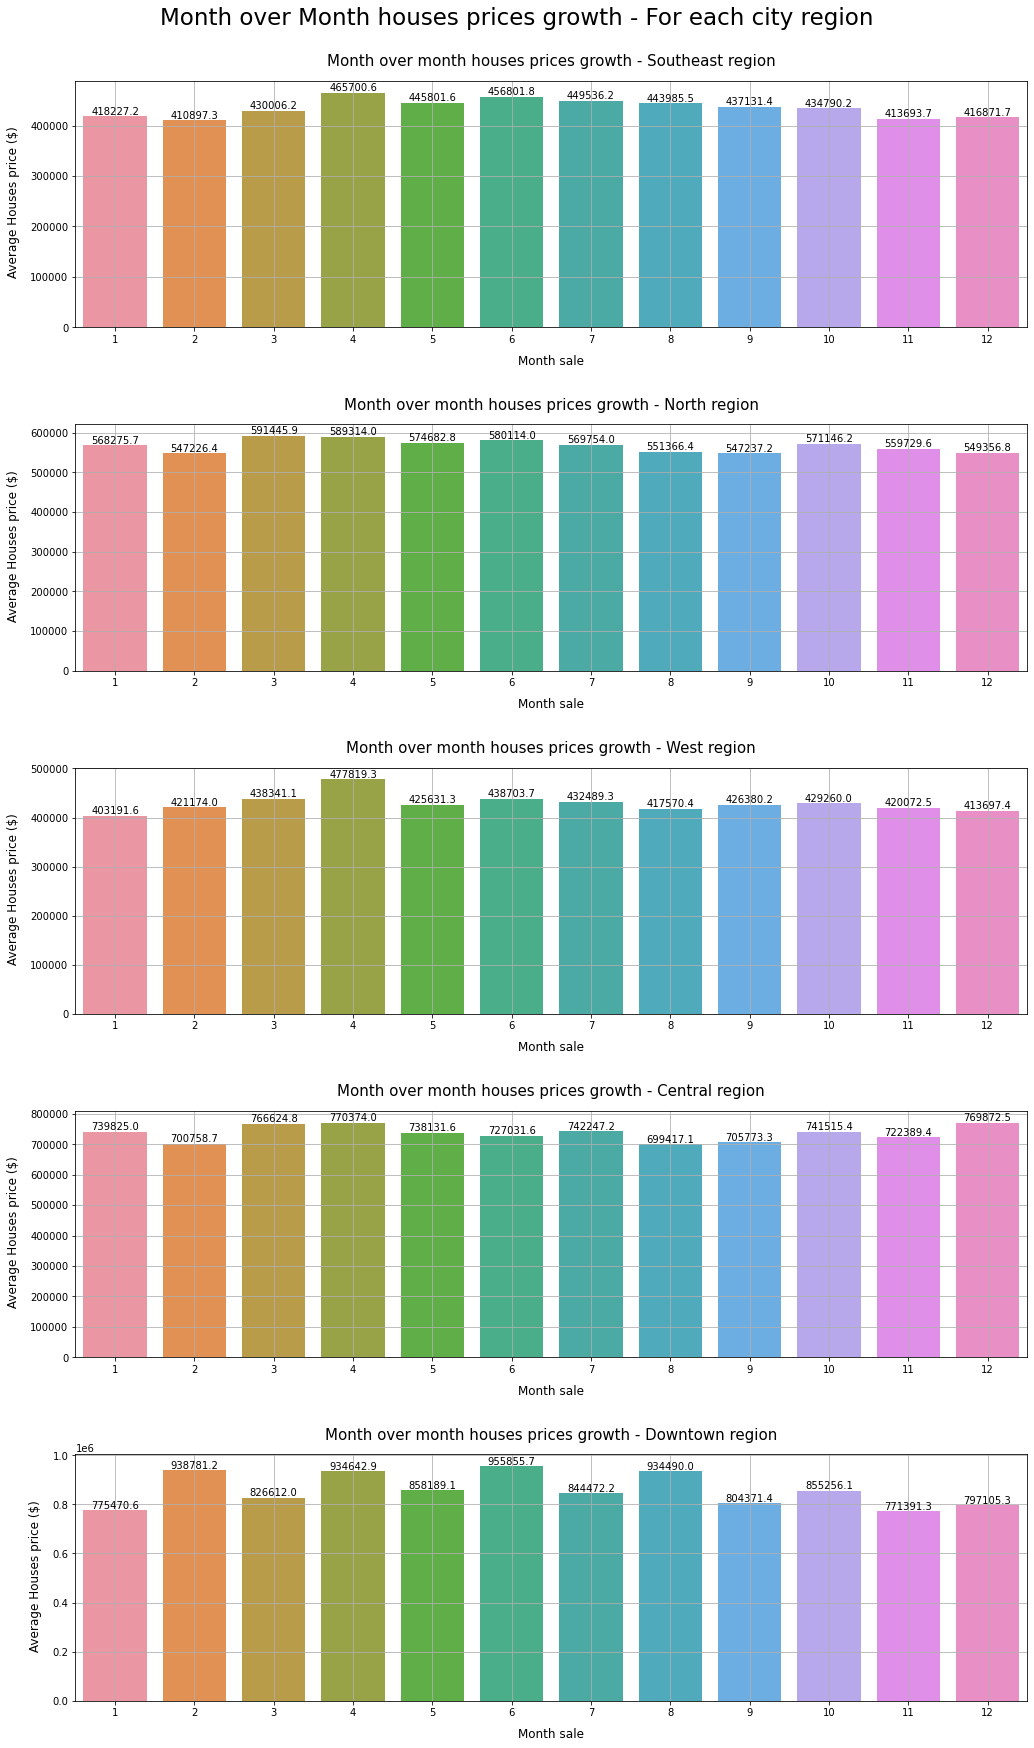

In [34]:
# creating a list with the city regions
regions = list(df3['region'].unique())

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(5, 1, figsize= (15, 25))

# setting the figure title and size
fig.suptitle(f"Month over Month houses prices growth - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(5*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(5, 1, n+1)  

    # calling the 'aux_by_region' function to create an auxilar dataset
    aux_region = aux_by_region(region, 'price', 'month_sale')

    # setting axes graph, title, labels and sizes
    ax = sns.barplot(x= aux_region['month_sale'], y= aux_region['price'])
    ax.set_title(f"Month over month houses prices growth - {region} region", size= 15, pad= 15)
    ax.set_xlabel(f'Month sale', size= 12, labelpad= 10)
    ax.set_ylabel(f' Average Houses price ($)', size= 12, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H5' in the storytelling folder 
plt.savefig(f'../storytelling/H5.png')

# displaying the plot
plt.show()

***
**As seen above:**

- Southeast region don't have the average house's price minimum increase of 3% between each month. The house's price variates between the months, with ups and downs
<br>

- Southeast region don't have the average house's price minimum increase of 3% between each month. The house's price variates between the months, with ups and downs
<br>

- Southeast region don't have the average house's price minimum increase of 3% between each month. The house's price variates between the months, with ups and downs
<br>

- Southeast region don't have the average house's price minimum increase of 3% between each month. The house's price variates between the months, with ups and downs
<br>

- Southeast region don't have the average house's price minimum increase of 3% between each month. The house's price variates between the months, with ups and downs
<br>

But, when analyzing all city regions, its clearly visible that, when talking about average house's prices sold and not the amount of houses sold, April is the month that sells the expensive houses

### <font color=green size= 4>4.2.6 **HYPOTHESIS 6 (H6):** For all city regions, houses prices growth year over year is at a 10% minimum  </font> - **FALSE**
***

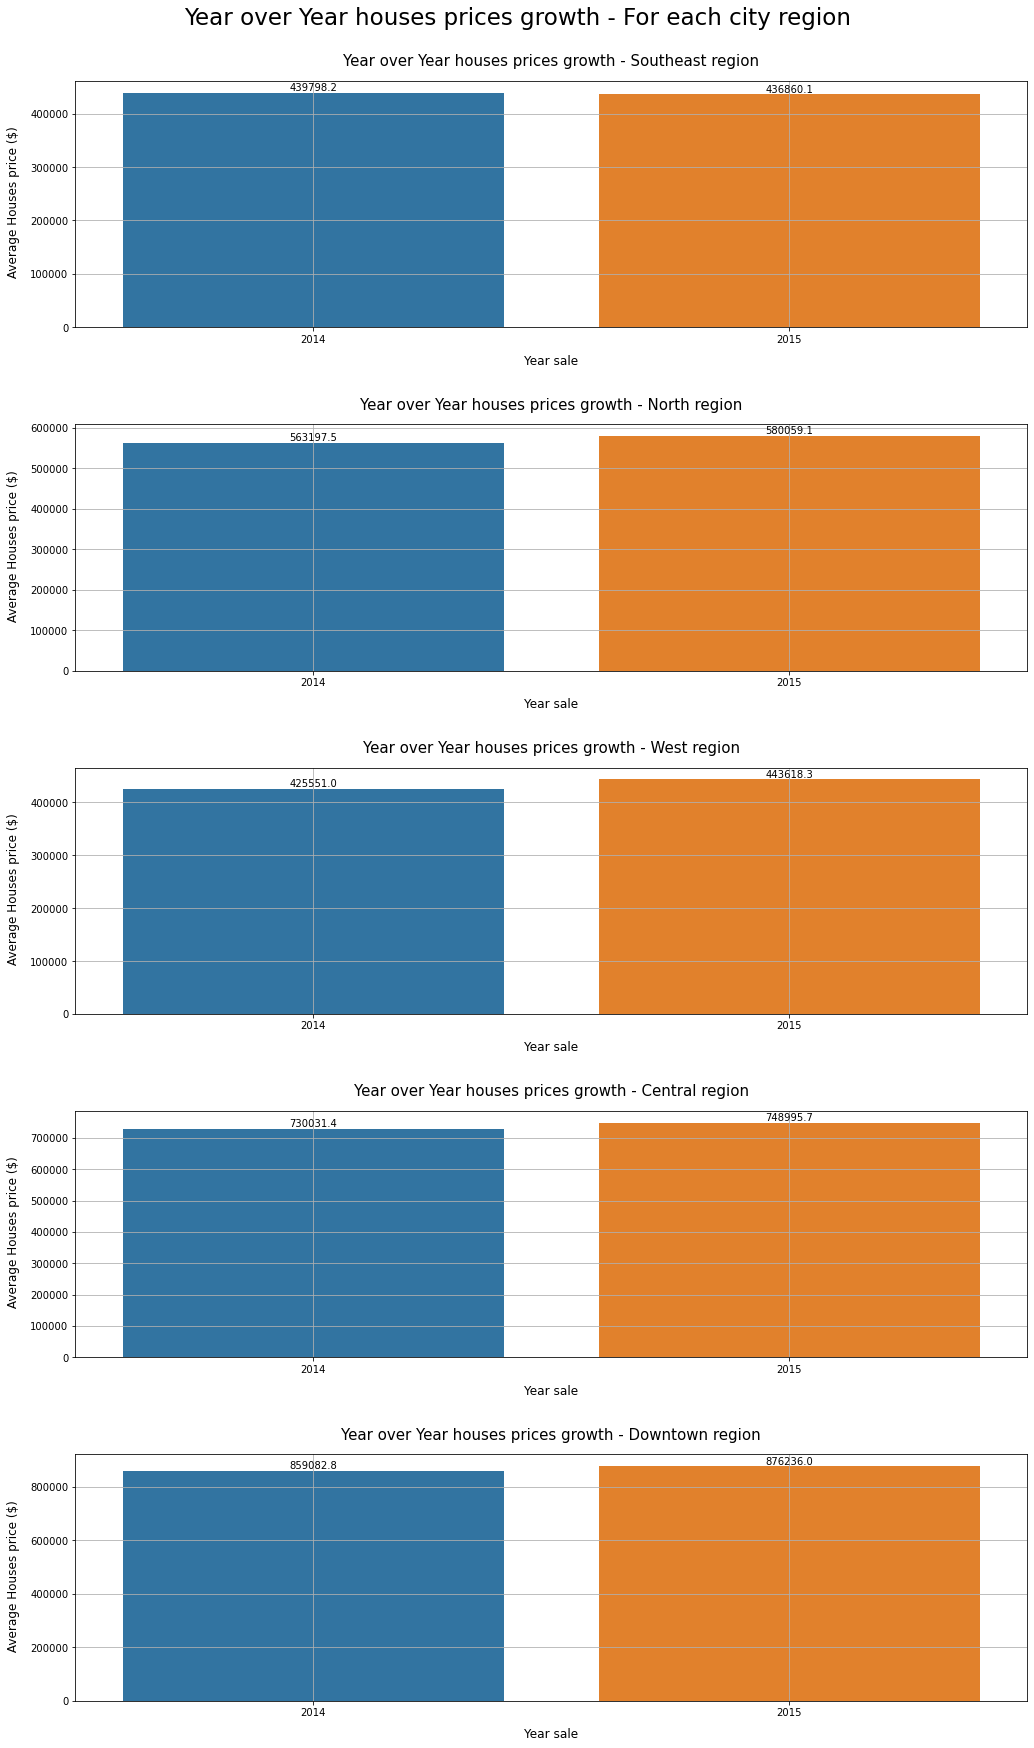

In [35]:
# creating a list with the city regions
regions = list(df3['region'].unique())

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(5, 1, figsize= (15, 25))

# setting the figure title and size
fig.suptitle(f"Year over Year houses prices growth - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(5*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(5, 1, n+1)  

    # calling the 'aux_by_region' function to create an auxilar dataset
    aux_region = aux_by_region(region, 'price', 'year_sale')

    # setting axes graph, title, labels and sizes
    ax = sns.barplot(x= aux_region['year_sale'], y= aux_region['price'])
    ax.set_title(f"Year over Year houses prices growth - {region} region", size= 15, pad= 15)
    ax.set_xlabel(f'Year sale', size= 12, labelpad= 10)
    ax.set_ylabel(f' Average Houses price ($)', size= 12, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H6' in the storytelling folder 
plt.savefig(f'../storytelling/H6.png')

# displaying the plot
plt.show()

***
**As seen above:**

- Southeast region don't have the average house's price minimum increase of 10% between the years. Also, the average houses price sold decreases between 2014 and 2015
<br>

- North region do presents an average house's price minimum increase between the years. The increase was 2,99%, nothing close to 10%
<br>

- West region do presents an average house's price minimum increase between the years. The increase was 4,24%, nothing close to 10%
<br>

- Central region do presents an average house's price minimum increase between the years. The increase was 2,77%, nothing close to 10%
<br>

- Downtown region do presents an average house's price minimum increase between the years. The increase was 2,00%, nothing close to 10%
<br>

### <font color=green size= 4>4.2.7 **HYPOTHESIS 7 (H7):** For all city regions, their houses floor's number growth increases the house's price at a 20% minimum  </font> - **FALSE**
***

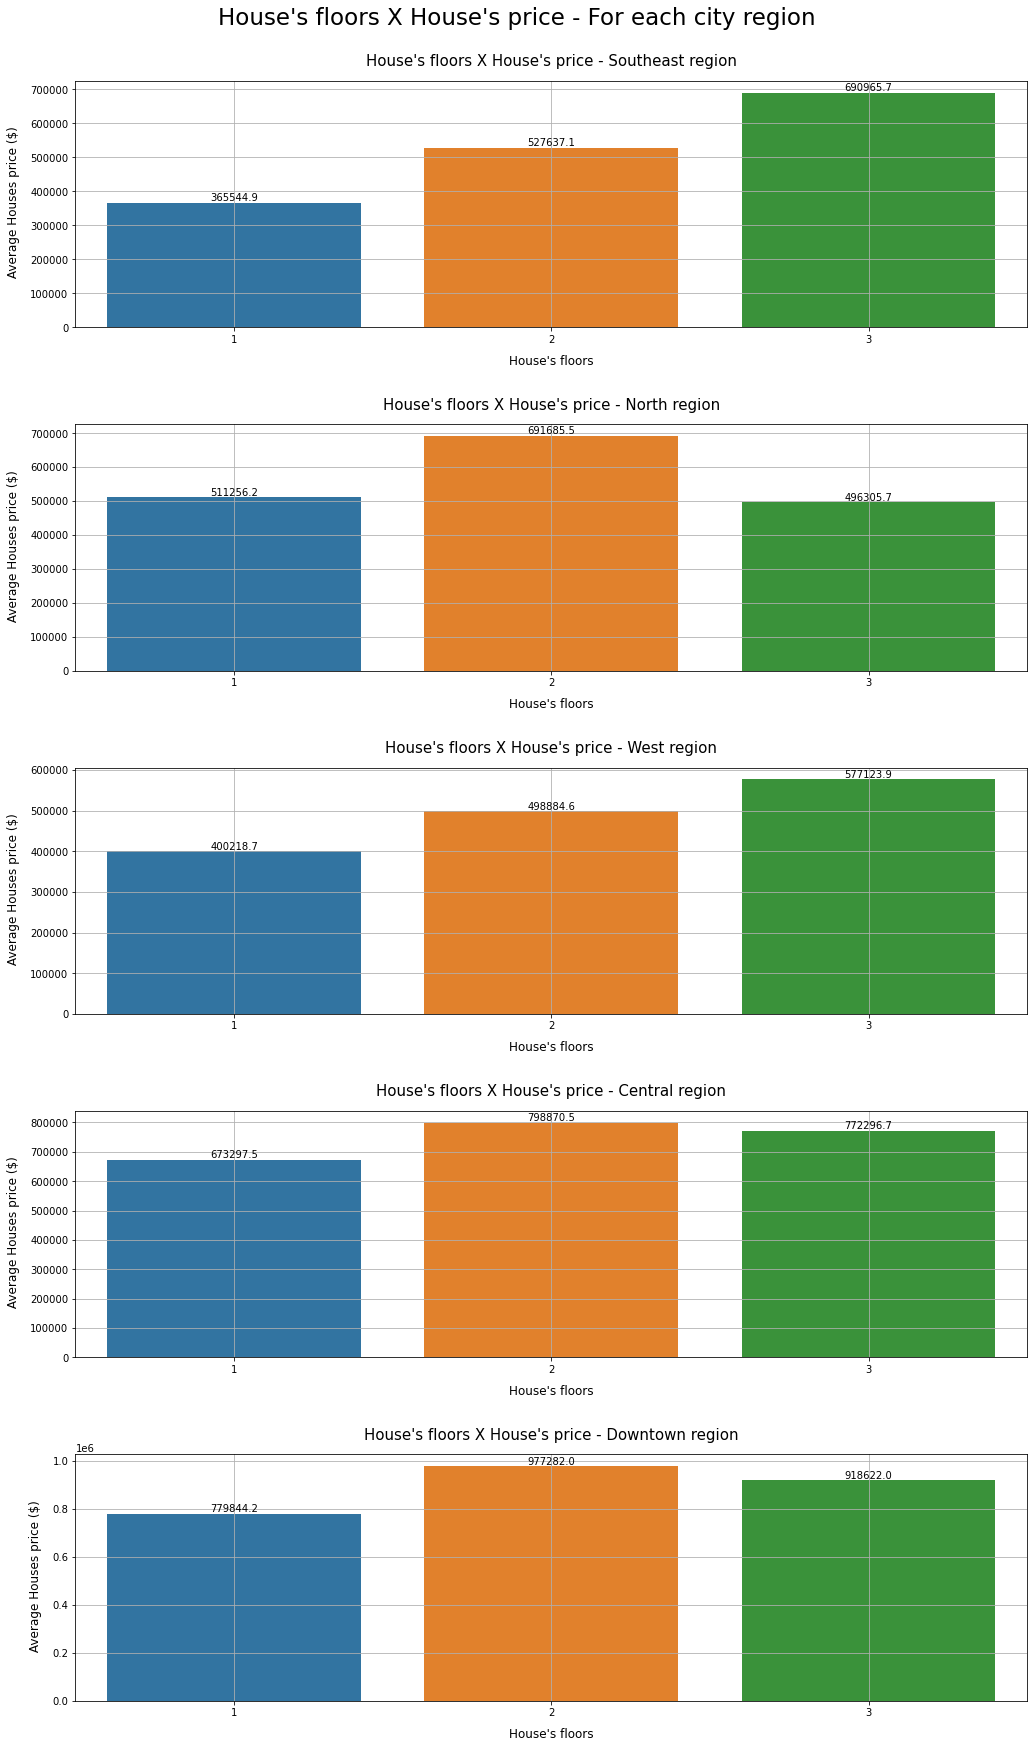

In [36]:
# creating a list with the city regions
regions = list(df3['region'].unique())

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(5, 1, figsize= (15, 25))

# setting the figure title and size
fig.suptitle(f"House's floors X House's price - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(5*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(5, 1, n+1)  

    # calling the 'aux_by_region' function to create an auxilar dataset
    aux_region = aux_by_region(region, 'price', 'floors')

    # setting axes graph, title, labels and sizes
    ax = sns.barplot(x= aux_region['floors'], y= aux_region['price'])
    ax.set_title(f"House's floors X House's price - {region} region", size= 15, pad= 15)
    ax.set_xlabel(f"House's floors", size= 12, labelpad= 10)
    ax.set_ylabel(f' Average Houses price ($)', size= 12, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H7' in the storytelling folder 
plt.savefig(f'../storytelling/H7.png')

# displaying the plot
plt.show()

***
**As seen above:**

- Southeast region do have the average house's price minimum increase of 20% when renovating its amount of floors. With a significant average house's price increase of 44,34% when upgrading from 1 to 2 floors
<br>

- North region don't have the average house's price minimum increase of 20% when renovating its amount of floors. Also, the average house's prices decreases when upgrading from 2 to 3 floors, probably because of other features influences
<br>

- West region do have the average house's price minimum increase of 20% when renovating its amount of floors. With a significant average house's price increase of 24,65% when upgrading from 1 to 2 floors
<br>

- Central region don't have the average house's price minimum increase of 20% when renovating its amount of floors. Also, the average house's prices decreases when upgrading from 2 to 3 floors, probably because of other features influences
<br>

- Downtown region don't have the average house's price minimum increase of 20% when renovating its amount of floors. Also, the average house's prices decreases when upgrading from 2 to 3 floors, probably because of other features influences. But, it has a significant average house's price increase of 25,32% when upgrading from 1 to 2 floors

### <font color=green size= 4>4.2.8 **HYPOTHESIS 8 (H8):** For all city regions, the Living Area size growth is more likely to increase the house's prices  </font> - **TRUE**
***

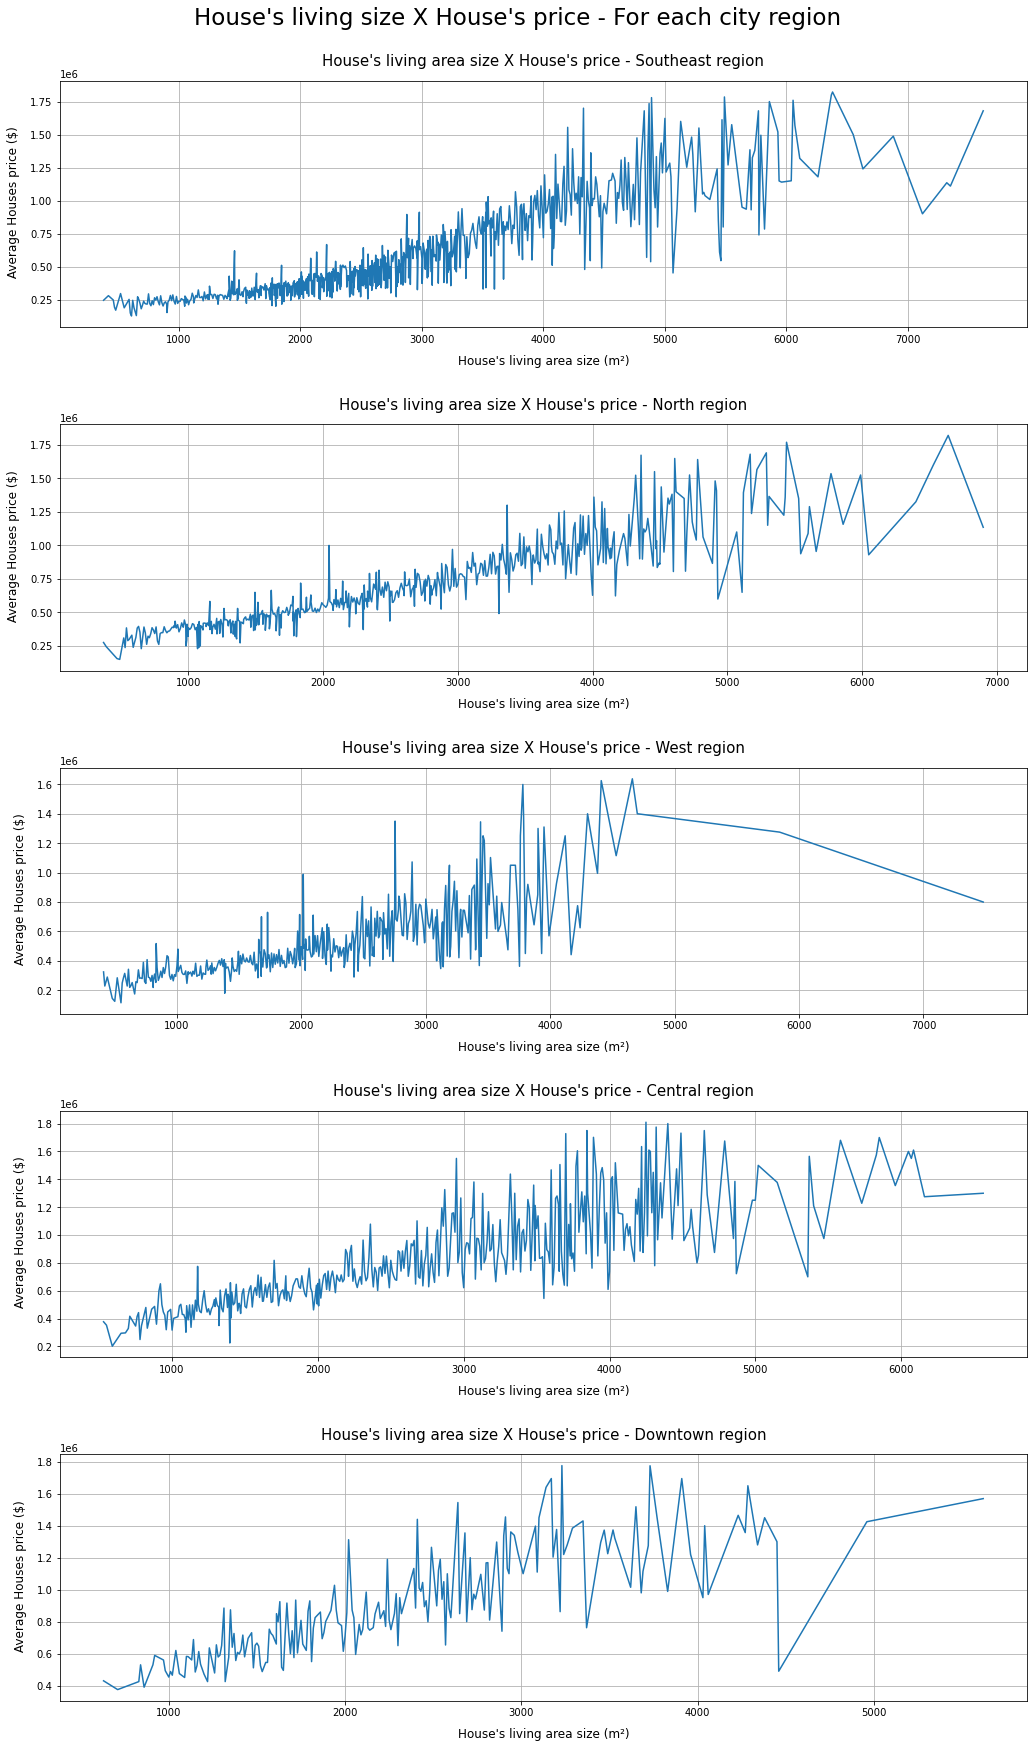

In [37]:
# creating a list with the city regions
regions = list(df3['region'].unique())

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(5, 1, figsize= (15, 25))

# setting the figure title and size
fig.suptitle(f"House's living size X House's price - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(5*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(5, 1, n+1)  

    # creating an auxiliar dataset
    aux_region = df3[df3['region'] == region]
    aux_region = aux_region[['price', 'living_area']].groupby('living_area').mean()
    aux_region.reset_index(drop= False, inplace= True)


    # setting axes graph, title, labels and sizes
    ax = sns.lineplot(x= aux_region['living_area'], y= aux_region['price'])
    ax.set_title(f"House's living area size X House's price - {region} region", size= 15, pad= 15)
    ax.set_xlabel(f"House's living area size (m²)", size= 12, labelpad= 10)
    ax.set_ylabel(f' Average Houses price ($)', size= 12, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H8' in the storytelling folder 
plt.savefig(f'../storytelling/H8.png')

# displaying the plot
plt.show()

***
**As seen above:**

For all city's regions, its clearly that not always a living area size increase will increase the average house's prices, because of other variables influences. But, analyzing with a macro view, its visible that the living area size increase will likely increase the house's price.

### <font color=green size= 4>4.2.9 **HYPOTHESIS 9 (H9):** For all city regions, the (Living Area / Land Space) proportion growth is more likely to increase the house's prices  </font> - **FALSE**
***

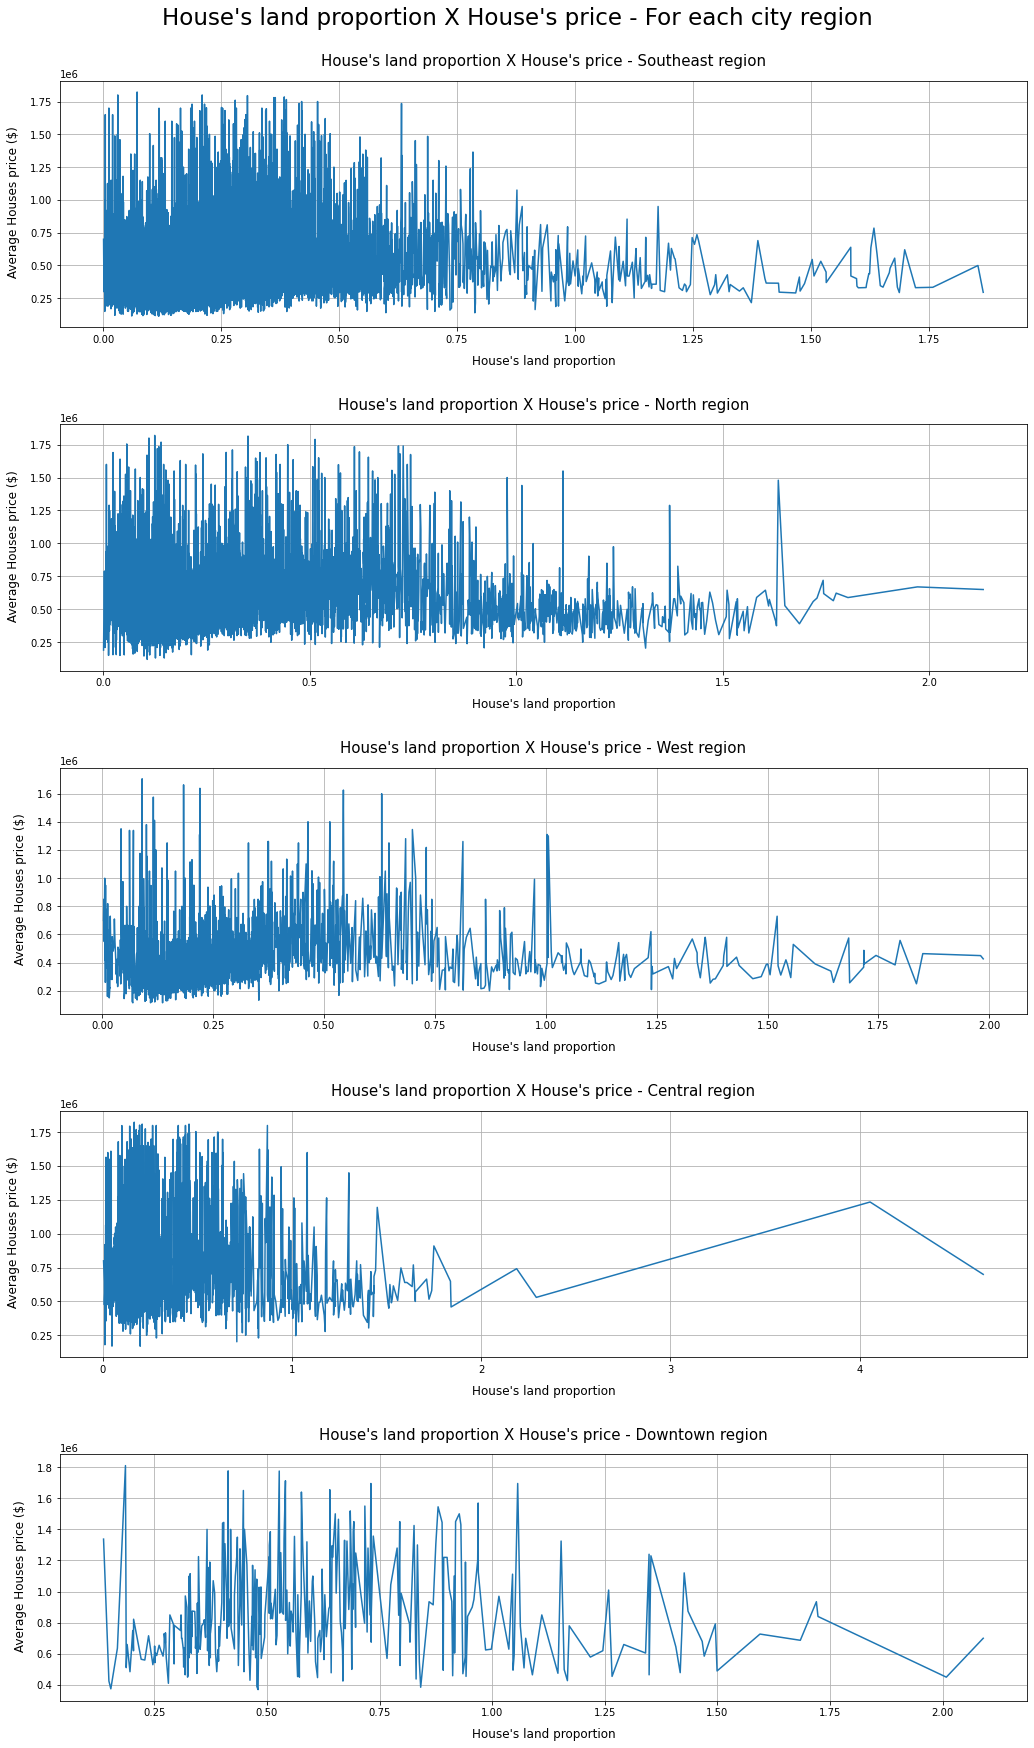

In [38]:
# creating a list with the city regions
regions = list(df3['region'].unique())

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(5, 1, figsize= (15, 25))

# setting the figure title and size
fig.suptitle(f"House's land proportion X House's price - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(5*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(5, 1, n+1)  

    # creating an auxiliar dataset
    aux_region = df3[df3['region'] == region]
    aux_region['land_proportion'] = aux_region['living_area'].values / aux_region['land_area'].values
    aux_region = aux_region[['price', 'land_proportion']].groupby('land_proportion').mean()
    aux_region.reset_index(drop= False, inplace= True)


    # setting axes graph, title, labels and sizes
    ax = sns.lineplot(x= aux_region['land_proportion'], y= aux_region['price'])
    ax.set_title(f"House's land proportion X House's price - {region} region", size= 15, pad= 15)
    ax.set_xlabel(f"House's land proportion", size= 12, labelpad= 10)
    ax.set_ylabel(f' Average Houses price ($)', size= 12, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H9' in the storytelling folder 
plt.savefig(f'../storytelling/H9.png')

# displaying the plot
plt.show()

***
**As seen above:**

For all city's regions, there is no visible pattern of house's prices increase or decrease when increasing the living area / land area proportion.

### <font color=green size= 4>4.2.10 **HYPOTHESIS 10 (H10):** Houses with water view has a average price growth of 10% by increasing the house's Living Condition  </font> - **FALSE**
***

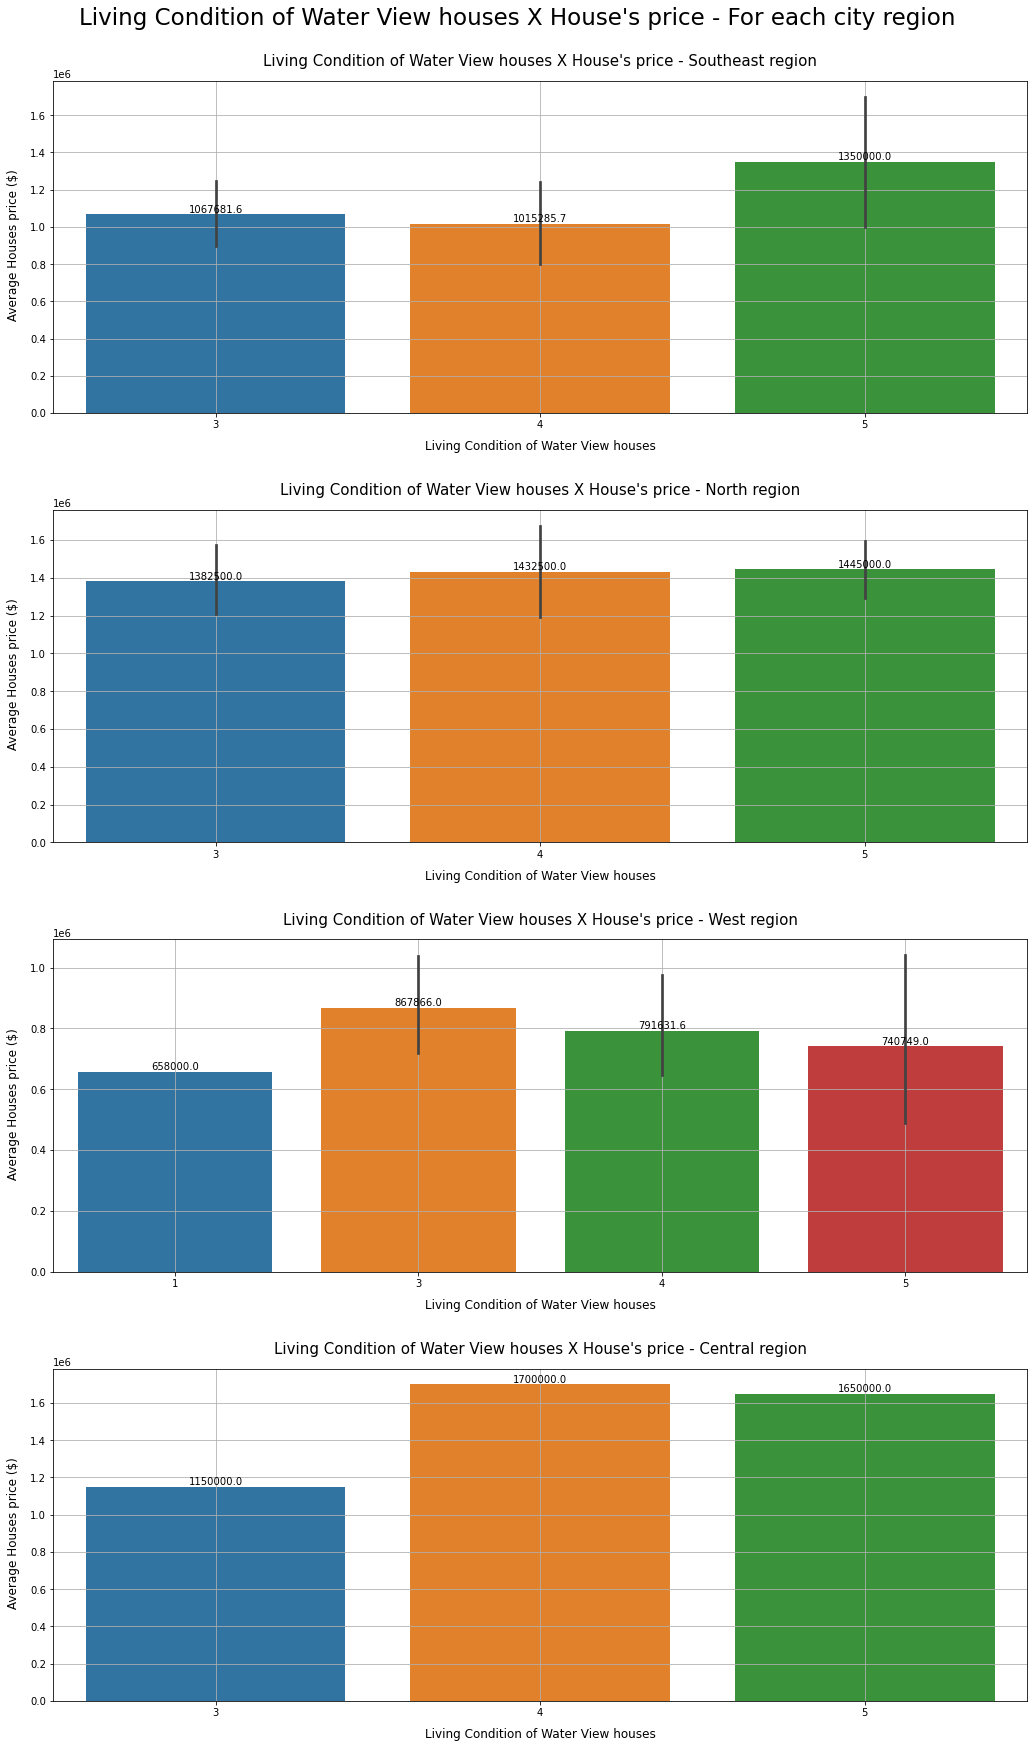

In [39]:
# creating a list with the city regions
regions = list(df3['region'].unique())

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(4, 1, figsize= (15, 25))

# setting the figure title and size
fig.suptitle(f"Living Condition of Water View houses X House's price - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(4*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(4, 1, n+1)  

    # creating an auxilar dataset
    aux_region = df3[(df3['region'] == region) & (df3['water_view'] == 'Yes')]

    # setting axes graph, title, labels and sizes
    ax = sns.barplot(x= aux_region['living_condition'], y= aux_region['price'])
    ax.set_title(f"Living Condition of Water View houses X House's price - {region} region", size= 15, pad= 15)
    ax.set_xlabel(f'Living Condition of Water View houses', size= 12, labelpad= 10)
    ax.set_ylabel(f' Average Houses price ($)', size= 12, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H10' in the storytelling folder 
plt.savefig(f'../storytelling/H10.png')

# displaying the plot
plt.show()

***
**As seen above:**

- There is no houses with water view in Downtown region
<br>

- Southeast region don't have the average water view house's price minimum increase of 10% when upgrading the living condition levels. Also, there is no houses with living condition level less than 3 in Southeast region
<br>

- North region don't have the average water view house's price minimum increase of 10% when upgrading the living condition levels. The house's price tends to remain the same. Also, there is no houses with living condition level less than 3 in Southeast region
<br>

- West region don't have the average water view house's price minimum increase of 10% when upgrading the living condition levels. Also, there is a house's price decrease pattern after a living condition level 3
<br>

- Central region don't have the average water view house's price minimum increase of 10% when upgrading the living condition levels. But its important to notice that there is a significant average house's price increase of 47,82% when upgrading it from living condition level 3 to 4

### <font color=green size= 4>4.2.11 **HYPOTHESIS 11 (H11):** For all city regions, by increasing the bedrooms quantity its most likely to increases the house prices  </font> - **TRUE**
***

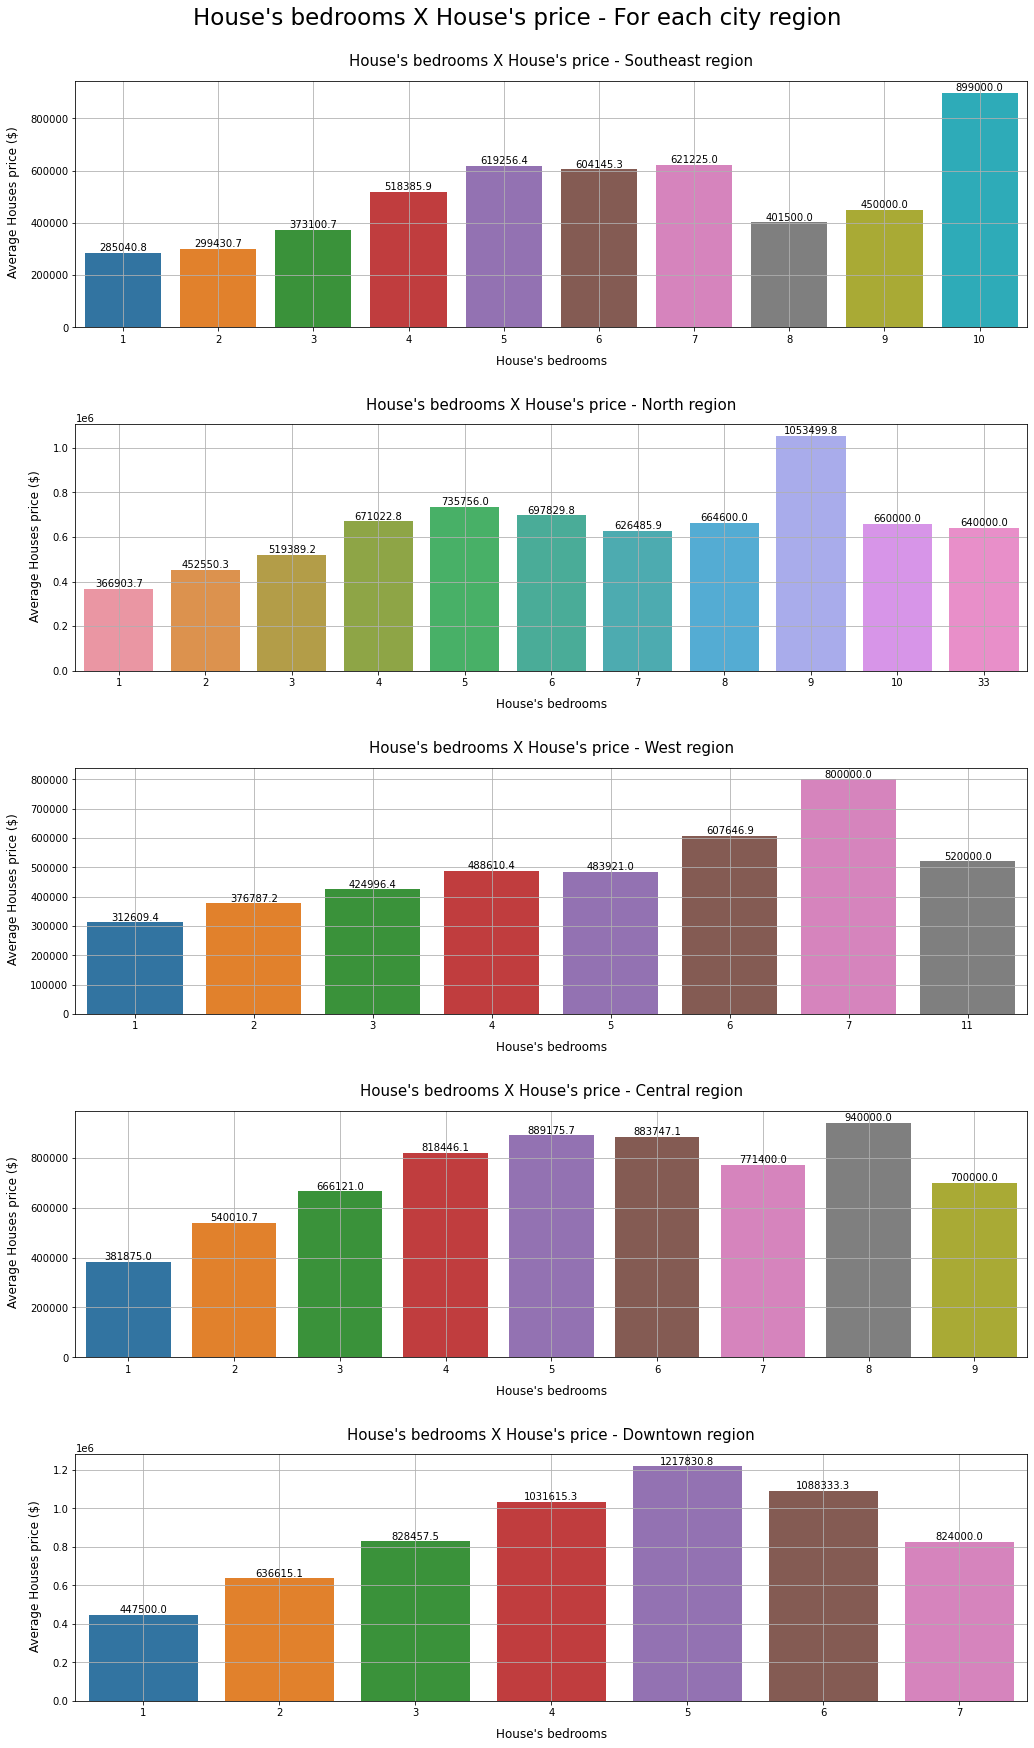

In [40]:
# creating a list with the city regions
regions = list(df3['region'].unique())

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(5, 1, figsize= (15, 25))

# setting the figure title and size
fig.suptitle(f"House's bedrooms X House's price - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(5*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(5, 1, n+1)  

    # calling the 'aux_by_region' function to create an auxilar dataset
    aux_region = aux_by_region(region, 'price', 'bedrooms')

    # setting axes graph, title, labels and sizes
    ax = sns.barplot(x= aux_region['bedrooms'], y= aux_region['price'])
    ax.set_title(f"House's bedrooms X House's price - {region} region", size= 15, pad= 15)
    ax.set_xlabel(f"House's bedrooms", size= 12, labelpad= 10)
    ax.set_ylabel(f' Average Houses price ($)', size= 12, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H11' in the storytelling folder 
plt.savefig(f'../storytelling/H11.png')

# displaying the plot
plt.show()

***
**As seen above:**

For all city's regions, there is a pattern that by increasing the bedrooms quantity its most likely that the house's price will increase too.

- Southeast region respects this pattern in a range between 1 and 5 bedrooms
<br>

- North region respects this pattern in a range between 1 and 5 bedrooms
<br>

- West region respects this pattern in a range between 1 and 7 bedrooms
<br>

- Central region respects this pattern in a range between 1 and 5 bedrooms
<br>

- Downtown region respects this pattern in a range between 1 and 5 bedrooms
<br>

### <font color=green size= 4>4.2.12 **HYPOTHESIS 12 (H12):** For all city regions, by increasing the bathrooms quantity its most likely to increases the house prices  </font> - **TRUE**
***

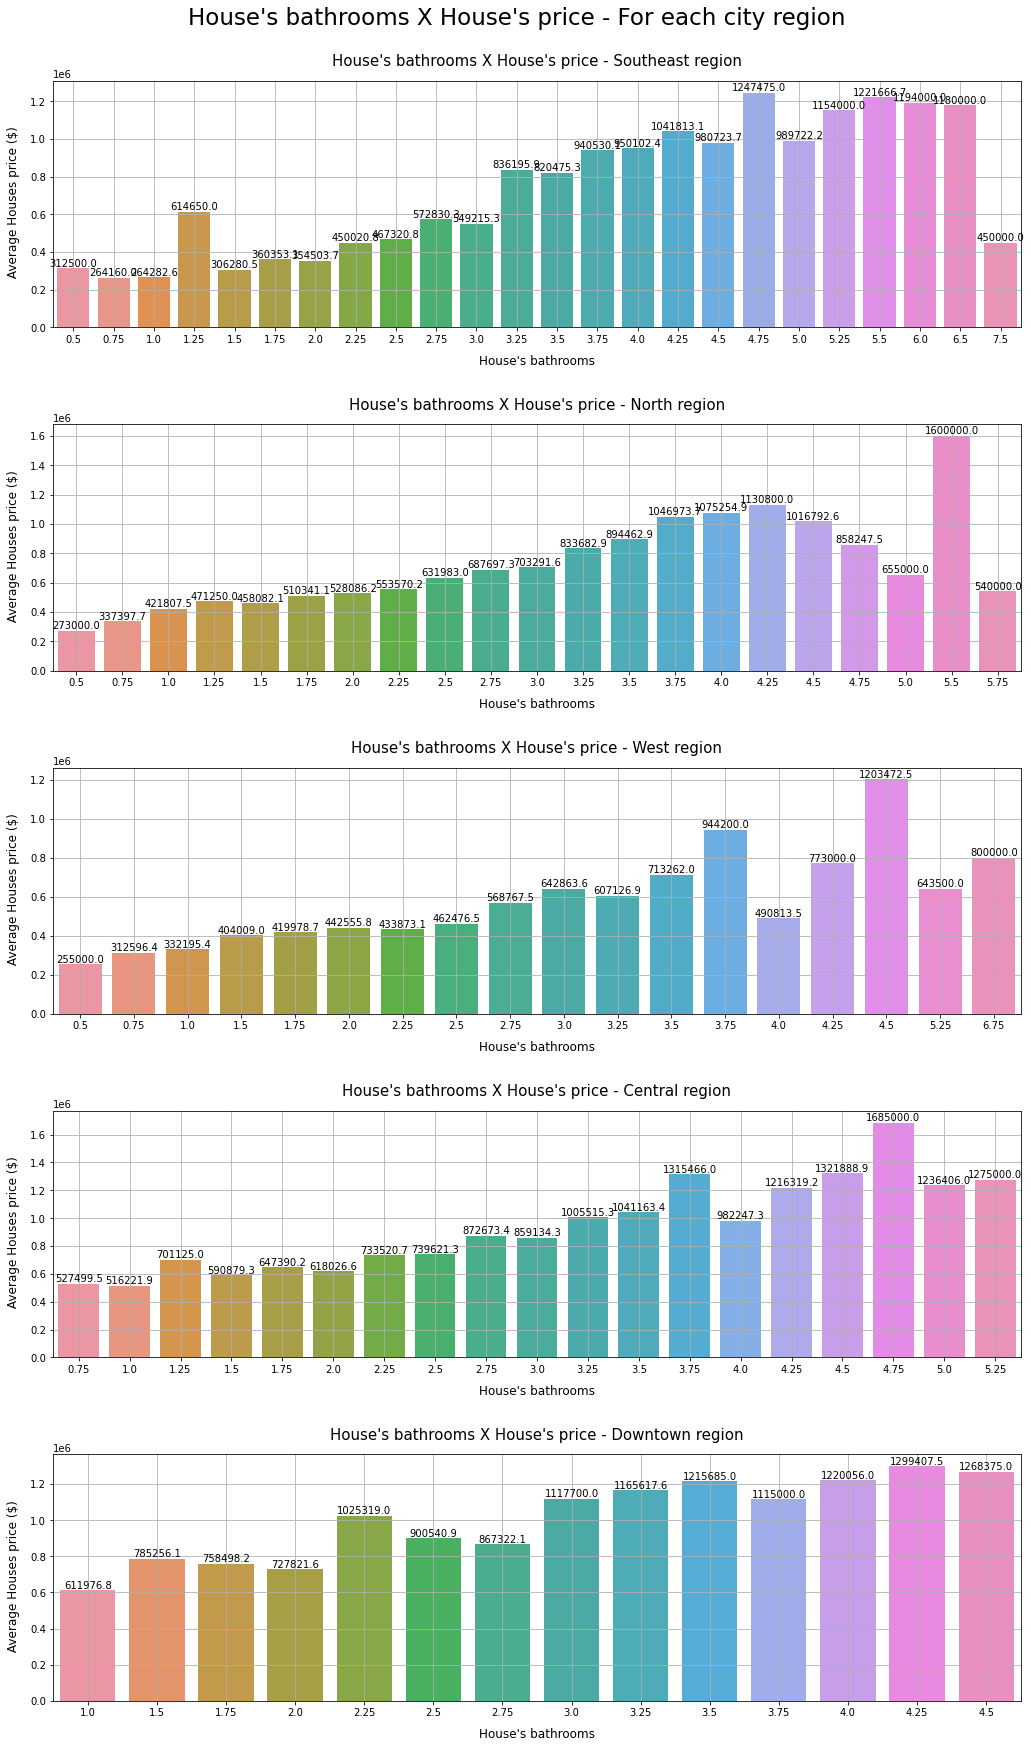

In [41]:
# creating a list with the city regions
regions = list(df3['region'].unique())

# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(5, 1, figsize= (15, 25))

# setting the figure title and size
fig.suptitle(f"House's bathrooms X House's price - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(5*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(5, 1, n+1)  

    # calling the 'aux_by_region' function to create an auxilar dataset
    aux_region = aux_by_region(region, 'price', 'bathrooms')

    # setting axes graph, title, labels and sizes
    ax = sns.barplot(x= aux_region['bathrooms'], y= aux_region['price'])
    ax.set_title(f"House's bathrooms X House's price - {region} region", size= 15, pad= 15)
    ax.set_xlabel(f"House's bathrooms", size= 12, labelpad= 10)
    ax.set_ylabel(f' Average Houses price ($)', size= 12, labelpad= 10)
    ax.grid()

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 5), 
               textcoords = 'offset points')

# adjusting subplot
plt.tight_layout(pad= 3)

# saving the graph as 'H12' in the storytelling folder 
plt.savefig(f'../storytelling/H12.png')

# displaying the plot
plt.show()

***
**As seen above:**

For all city's regions, there is a pattern that by increasing the bathrooms quantity its most likely that the house's price will increase too.

## <font color=green size= 5>4.3 MULTIVARIATE ANALYSIS </font>
***

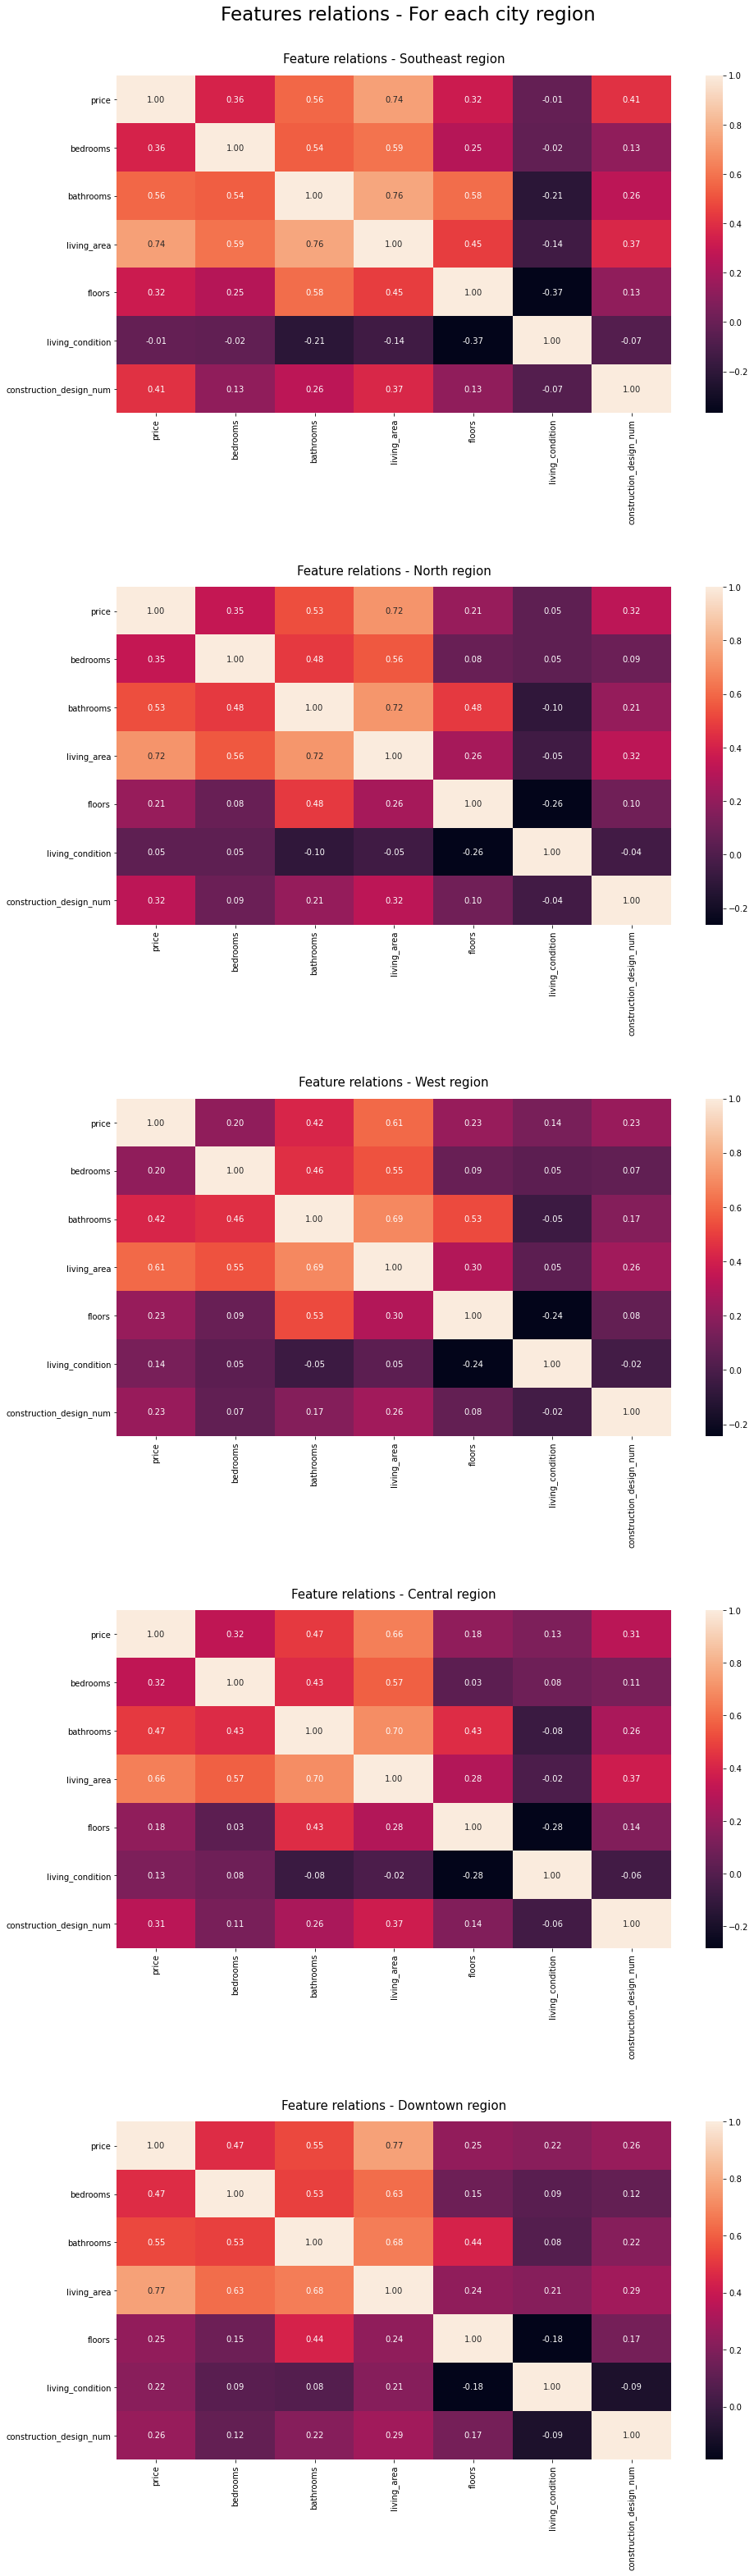

In [42]:
# creating a list with the city regions
regions = list(df3['region'].unique())

# creating a dataset's column as 'construction_design' column, but in numeral levels
df3['construction_design_num'] = df3['construction_design'].apply(lambda x: 
                                                                       1 if x == 'Low Quality' else
                                                                       2 if x == 'Average Quality' else
                                                                       3)


# creating a figure with 'n_rows' rows and 'n_cols' columns with n_rows*n_cols axes
fig, ax = plt.subplots(5, 1, figsize= (15, 45))

# setting the figure title and size
fig.suptitle(f"Features relations - For each city region", size= 23)

# returning model, with its axe and its enumerate value
for ax, n, region in zip(ax.flatten(), list(range(5*1)), regions):

    # creating a subplot for the selected model
    plt.subplot(5, 1, n+1)  

    # creating an auxilar dataset
    aux_region = df3[df3['region'] == region]
    aux_region = aux_region[['price', 'bedrooms', 'bathrooms', 'living_area', 'floors', 'living_condition', 'construction_design_num']]

    # creating a correlation matrix from 'df3_num' dataframe
    corre = aux_region.corr(method = 'pearson')

    # creating a heatmap graph using the correlation matrix 'corre' as data
    ax = sns.heatmap(corre, annot = True, fmt= '.2f')
    ax.set_title(f"Feature relations - {region} region", size= 15, pad= 15)
    
# adjusting subplot
plt.tight_layout(pad= 5)

# saving the graph as 'features_relations' in the storytelling folder 
plt.savefig(f'../storytelling/features_relations.png')

# displaying the plot
plt.show()

***
**As seen above:**

**For Southeast region:**
- **`price`** feature has a strong positive correlation with the **`living_area`** feature
- **`price`** feature has a moderate positive correlation with the **`bedrooms`**, **`bathrooms`**, **`floors`** and **`construction_design_num`** features
- **`living_condition`** feature has a **weird** negative correlation with all others features
<br>
<br>

**For North region:**
- **`price`** feature has a strong positive correlation with the **`living_area`** feature
- **`price`** feature has a moderate positive correlation with the **`bedrooms`**, **`bathrooms`**, **`floors`** and **`construction_design_num`** features
- **`living_condition`** feature has a **weird** negative correlation with the **`bathrooms`**, **`living_area`** and **`floors`** features
- **`living_condition`** feature has a **weird** weak positive correlation with the **`bedrooms`** and **`price`** features
<br>
<br>

**For West region:**
- **`price`** feature has a strong positive correlation with the **`living_area`** feature
- **`price`** feature has a moderate positive correlation with the **`bedrooms`**, **`bathrooms`**, **`floors`**, **`living_condition`** and **`construction_design_num`** features
- **`living_condition`** feature has a **weird** negative correlation with the **`bathrooms`** and **`floors`** features
- **`living_condition`** feature has a **weird** weak positive correlation with the **`bedrooms`**, **`living_area`** and **`price`** features
<br>
<br>

**For Central region:**
- **`price`** feature has a strong positive correlation with the **`living_area`** feature
- **`price`** feature has a moderate positive correlation with the **`bedrooms`**, **`bathrooms`**, **`floors`**, **`living_condition`** and **`construction_design_num`** features
- **`living_condition`** feature has a **weird** negative correlation with the **`bathrooms`**, **`living_area`** and **`floors`** features
- **`living_condition`** feature has a **weird** weak positive correlation with the **`bedrooms`** and **`price`** features
<br>
<br>

**For Downtown region:**
- **`price`** feature has a strong positive correlation with the **`living_area`** feature
- **`price`** feature has a moderate positive correlation with the **`bedrooms`**, **`bathrooms`**, **`floors`**, **`living_condition`** and **`construction_design_num`** features
- **`living_condition`** feature has a **weird** negative correlation with the **`floors`** feature
- **`living_condition`** feature has a **weird** weak positive correlation with the **`bedrooms`** and **`floors`** features

# <font color=green size= 6> <b>5. ANSWERING THE CEO'S QUESTIONS </font></b>
***

## <font color=green size= 5>5.1 WHICH HOUSES SHOULD THE COMPANY BUY AND AT WHAT PRICES? </font>
***

**Houses that the company should buy:**

1 - Our priority should be buying houses in Central region with a living condition level 2 and do a renovation so its living condition upgrades to level 3. This renovation will probably increase 75,53% the house's prices, as shown in H1. 

2 - As our second option would be buy houses in West region with a living condition level 2 and do a renovation so its living condition upgrades to level 3. This renovation will probably increase 58,83% the house's prices, as shown in H1. 

3 - As our third option would be buy houses in Southeast region with a living condition level 2 and do a renovation so its living condition upgrades to level 3. This renovation will probably increase 55,80% the house's prices, as shown in H1. 

- These renovations were considered having the same cost, i.e, it don't depends on the city's region
<br>
<br>

**Prices that the company should pay:**

If the company could calculate the renovations cost, and assuming that these renovations will cost less than the difference between the before and after renovation scenarios, the company should buy all houses mentioned previously, with prices on averange or lower.

If the company could not calculate the renovations cost, the company should buy all houses mentioned previously, but only with prices below averange. I suggest buy houses in those living conditions with prices 20% below average, so we secure our chances of profit

- These renovations should have a cost lower than the difference between before and after living condition scenarios, so the company profit with it

## <font color=green size= 5>5.2 ONCE THE HOUSE IS IN THE COMPANY'S POSSESSION, WHAT IS THE BEST TIME TO SELL IT AND WHAT WOULD BE THE SALE PRICE?</font>
***

**Best time to sell the bought houses:**

As seen in H3 and H4, all city's regions has its sales peak during the spring, followed by summer. So these are the periods that I suggest to sell the houses.
<br>
<br>

**Suggested prices for houses sale:**

After do a renovation on the bought houses, I suggest simply sell them on their new living condition's averange price, for each  region. Because our profit will be originated by the upgrading the living condition, not from trying to sell over their supposed average prices.

## <font color=green size= 5>5.3 SHOULD THE COMPANY MAKE A RENOVATION TO INCREASE THE SALE PRICE? WHAT WOULD BE THE SUGGESTIONS FOR THE CHANGES?</font>
***

**About if the company should make a renovation:**

Yes, it should. All suggestions are based on renovations, as previously mentioned.
<br>
<br>

**Changing suggestions:**

- Even though the **`living_condition`** feature has sometimes a negative and sometimes a weak correlation with the features that it supposed to have a strong correlation, such as **`bedrooms`**, **`bathrooms`**, **`floors`** and **`living_area`**, as shown in section 4.3, I will assume that these features have strong correlation

- As shown in H8, by increasing the **`living_area`** the house's price will probably increases too. 
- As shown in H7, by increasing the **`floors`** quantity the house's price will increases too. 
<br>

So, I suggest that for houses with a small **`living_area`** / **`land_area`** proportion (lower than 1), the renovation focus should be into build more **`bedrooms`** and **`bathrooms`**, respecting the range accepted of **`bedrooms`** and **`bathrooms`** that increases the house's price, as shown in H11 and H12, respectively.

And for houses with a significant **`living_area`** / **`land_area`** proportion (higher than 1), the renovation focus should be into build a new floor, then build more **`bedrooms`** and **`bathrooms`**, respecting the range accepted of **`bedrooms`** and **`bathrooms`** that increases the house's price, as shown in H11 and H12, respectively.

# <font color=green size= 6> <b>6. BUSSINESS SIMULATION </font></b>
***

Because of the lack of information, I will assume some premisses for each scenario simulation.

## <font color=green size= 5>6.1 EXPECTED SCENARIO </font>
***

- For this scenario, I will assume that the renovation costs will be 30% of the bought house's price
<br>

- For this scenario, I will assume that we are going to buy the houses at their average price or lower, then sell them at their average prices, accordingly to their living condition level

In [43]:
#creating an auxiliar dataset filtering only the houses with living condition level 2
aux_LC_2 = df3[df3['living_condition']== 2]

# grouping the auxilar dataset by 'region' feature and calculating the average house's price of each 'region'
aux_region_mean_price_LC_2 = aux_LC_2[['price', 'region']].groupby('region').mean().reset_index(drop= False)

# creating an empty dataframe
df_houses_to_buy = pd.DataFrame()


for region, price_buy in zip(list(aux_region_mean_price_LC_2['region']), list(aux_region_mean_price_LC_2['price'])):
        
    df_houses_to_buy_region = aux_LC_2[(aux_LC_2['region'] == region) & (aux_LC_2['price'] <= price_buy)]
    
    # combining the 'df_houses_to_buy_region' in the initially empty 'df_houses_to_buy' dataframe
    df_houses_to_buy = pd.concat([df_houses_to_buy, df_houses_to_buy_region])

    # resetting and drop 'df_houses_to_buy' dataframe index
    df_houses_to_buy.reset_index(drop= True, inplace= True)
    

# saving the 'df_houses_to_buy' as a .csv file
df_houses_to_buy.to_csv("../parameters/df_houses_to_buy.csv")

    
#creating an auxiliar dataset filtering only the houses with living condition level 3
aux_LC_3 = df3[df3['living_condition']== 3]

# grouping the auxilar dataset by 'region' feature and calculating the average house's price of each 'region'
aux_region_mean_price_LC_3 = aux_LC_3[['price', 'region']].groupby('region').mean().reset_index(drop= False)

# creating a dataset's column with the difference between the (buy price + renovation cost) and sell price
df_houses_to_buy['profit'] = df_houses_to_buy.apply(lambda x:
(aux_region_mean_price_LC_3['price'][0] - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][0]) else
(aux_region_mean_price_LC_3['price'][1] - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][1]) else
(aux_region_mean_price_LC_3['price'][2] - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][2]) else
(aux_region_mean_price_LC_3['price'][3] - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][3]) else
(aux_region_mean_price_LC_3['price'][4] - 1.3 *(x['price'])), axis= 1)

# instantiating the 'profit' as the dataset's 'profit' column sum                                                           
profit = df_houses_to_buy['profit'].sum()        

# instantiating the 'ROI' 
roi = ((df_houses_to_buy['profit'].sum() / (1.3* df_houses_to_buy['price'].sum())))
       
       
# priting the expected profit
print(f'Expected profit: $ {round(profit, 2)}')
       
# priting the expected return over investiment
print(f'Expected ROI: {round(roi, 2)}%')

Expected profit: $ 16831921.21
Expected ROI: 0.6%


## <font color=green size= 5>6.2 WORST SCENARIO </font>
***

- For this scenario, I will assume that the renovation costs will be 30% of the bought house's price
<br>

- For this scenario, I will assume that we are going to buy the houses at their average price or lower, then sell them at 20% below their average prices, accordingly to their living condition level

In [44]:
#creating an auxiliar dataset filtering only the houses with living condition level 2
aux_LC_2 = df3[df3['living_condition']== 2]

# grouping the auxilar dataset by 'region' feature and calculating the average house's price of each 'region'
aux_region_mean_price_LC_2 = aux_LC_2[['price', 'region']].groupby('region').mean().reset_index(drop= False)

# creating an empty dataframe
df_houses_to_buy = pd.DataFrame()


for region, price_buy in zip(list(aux_region_mean_price_LC_2['region']), list(aux_region_mean_price_LC_2['price'])):
        
    df_houses_to_buy_region = aux_LC_2[(aux_LC_2['region'] == region) & (aux_LC_2['price'] <= price_buy)]
    
    # combining the 'df_houses_to_buy_region' in the initially empty 'df_houses_to_buy' dataframe
    df_houses_to_buy = pd.concat([df_houses_to_buy, df_houses_to_buy_region])

    # resetting and drop 'df_houses_to_buy' dataframe index
    df_houses_to_buy.reset_index(drop= True, inplace= True)

    
#creating an auxiliar dataset filtering only the houses with living condition level 3
aux_LC_3 = df3[df3['living_condition']== 3]

# grouping the auxilar dataset by 'region' feature and calculating the average house's price of each 'region'
aux_region_mean_price_LC_3 = aux_LC_3[['price', 'region']].groupby('region').mean().reset_index(drop= False)

# creating a dataset's column with the difference between the (buy price + renovation cost) and sell price
df_houses_to_buy['profit'] = df_houses_to_buy.apply(lambda x:
(0.8 *(aux_region_mean_price_LC_3['price'][0]) - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][0]) else
(0.8 *(aux_region_mean_price_LC_3['price'][1]) - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][1]) else
(0.8 *(aux_region_mean_price_LC_3['price'][2]) - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][2]) else
(0.8 *(aux_region_mean_price_LC_3['price'][3]) - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][3]) else
(0.8 *(aux_region_mean_price_LC_3['price'][4]) - 1.3 *(x['price'])), axis= 1)

# instantiating the 'profit' as the dataset's 'profit' column sum                                                           
profit = df_houses_to_buy['profit'].sum()        

# instantiating the 'ROI' 
roi = ((df_houses_to_buy['profit'].sum() / (1.3* df_houses_to_buy['price'].sum())))
       
       
# priting the expected profit
print(f'Expected profit: $ {round(profit, 2)}')
       
# priting the expected return over investiment
print(f'Expected ROI: {round(roi, 2)}%')

Expected profit: $ 7846357.17
Expected ROI: 0.28%


## <font color=green size= 5>6.3 BEST SCENARIO </font>
***

- For this scenario, I will assume that the renovation costs will be 30% of the bought house's price
<br>

- For this scenario, I will assume that we are going to buy the houses at their average price or lower, then sell them at 20% above their average prices, accordingly to their living condition level

In [45]:
#creating an auxiliar dataset filtering only the houses with living condition level 2
aux_LC_2 = df3[df3['living_condition']== 2]

# grouping the auxilar dataset by 'region' feature and calculating the average house's price of each 'region'
aux_region_mean_price_LC_2 = aux_LC_2[['price', 'region']].groupby('region').mean().reset_index(drop= False)

# creating an empty dataframe
df_houses_to_buy = pd.DataFrame()


for region, price_buy in zip(list(aux_region_mean_price_LC_2['region']), list(aux_region_mean_price_LC_2['price'])):
        
    df_houses_to_buy_region = aux_LC_2[(aux_LC_2['region'] == region) & (aux_LC_2['price'] <= price_buy)]
    
    # combining the 'df_houses_to_buy_region' in the initially empty 'df_houses_to_buy' dataframe
    df_houses_to_buy = pd.concat([df_houses_to_buy, df_houses_to_buy_region])

    # resetting and drop 'df_houses_to_buy' dataframe index
    df_houses_to_buy.reset_index(drop= True, inplace= True)

    
#creating an auxiliar dataset filtering only the houses with living condition level 3
aux_LC_3 = df3[df3['living_condition']== 3]

# grouping the auxilar dataset by 'region' feature and calculating the average house's price of each 'region'
aux_region_mean_price_LC_3 = aux_LC_3[['price', 'region']].groupby('region').mean().reset_index(drop= False)

# creating a dataset's column with the difference between the (buy price + renovation cost) and sell price
df_houses_to_buy['profit'] = df_houses_to_buy.apply(lambda x:
(1.2 *(aux_region_mean_price_LC_3['price'][0]) - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][0]) else
(1.2 *(aux_region_mean_price_LC_3['price'][1]) - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][1]) else
(1.2 *(aux_region_mean_price_LC_3['price'][2]) - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][2]) else
(1.2 *(aux_region_mean_price_LC_3['price'][3]) - 1.3 *(x['price'])) if (x['region'] == aux_region_mean_price_LC_3['region'][3]) else
(1.2 *(aux_region_mean_price_LC_3['price'][4]) - 1.3 *(x['price'])), axis= 1)

# instantiating the 'profit' as the dataset's 'profit' column sum                                                           
profit = df_houses_to_buy['profit'].sum()        

# instantiating the 'ROI' 
roi = ((df_houses_to_buy['profit'].sum() / (1.3* df_houses_to_buy['price'].sum())))
       
       
# priting the expected profit
print(f'Expected profit: $ {round(profit, 2)}')
       
# priting the expected return over investiment
print(f'Expected ROI: {round(roi, 2)}%')

Expected profit: $ 25817485.25
Expected ROI: 0.92%
